# Preparing plots for article

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
from matplotlib import rcParams


def get_sterror(data,subgroup):
    try:
        return data.loc[subgroup,:].std(numeric_only=True)/np.sqrt(len(data.loc[subgroup,:]))
    except:
        return data[subgroup].std(numeric_only=True)/np.sqrt(len(data[subgroup]))
    
#Loading data
# filename_input = 'database_subjectiver.csv'
# result = pd.read_csv(filename_input,sep=',')
result = pd.read_excel('database.xlsx')

group1 = result['Condition_x_first']=='Reskrypcja'
group2 = result['Condition_x_first']=='Reskrypcja10'
group3 = result['Condition_x_first']=='Ekspozycja'
group4 = result['Condition_x_first']=='CFT'
group_12 = group1 | group2
result['Condition_x_first'] = result['Condition_x_first'].replace({'Reskrypcja10':'Rescripting 10',
                                                                   'Reskrypcja':'Rescripting',
                                                                   'Ekspozycja':'Exposure'})

# Plotting results for each time point


C:\Users\skarkosz\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\1302099309.py:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\skarkosz\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\1302099309.py:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\skarkosz\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\1302099309.py:47: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\skarkosz\AppData

<Figure size 2000x3000 with 0 Axes>

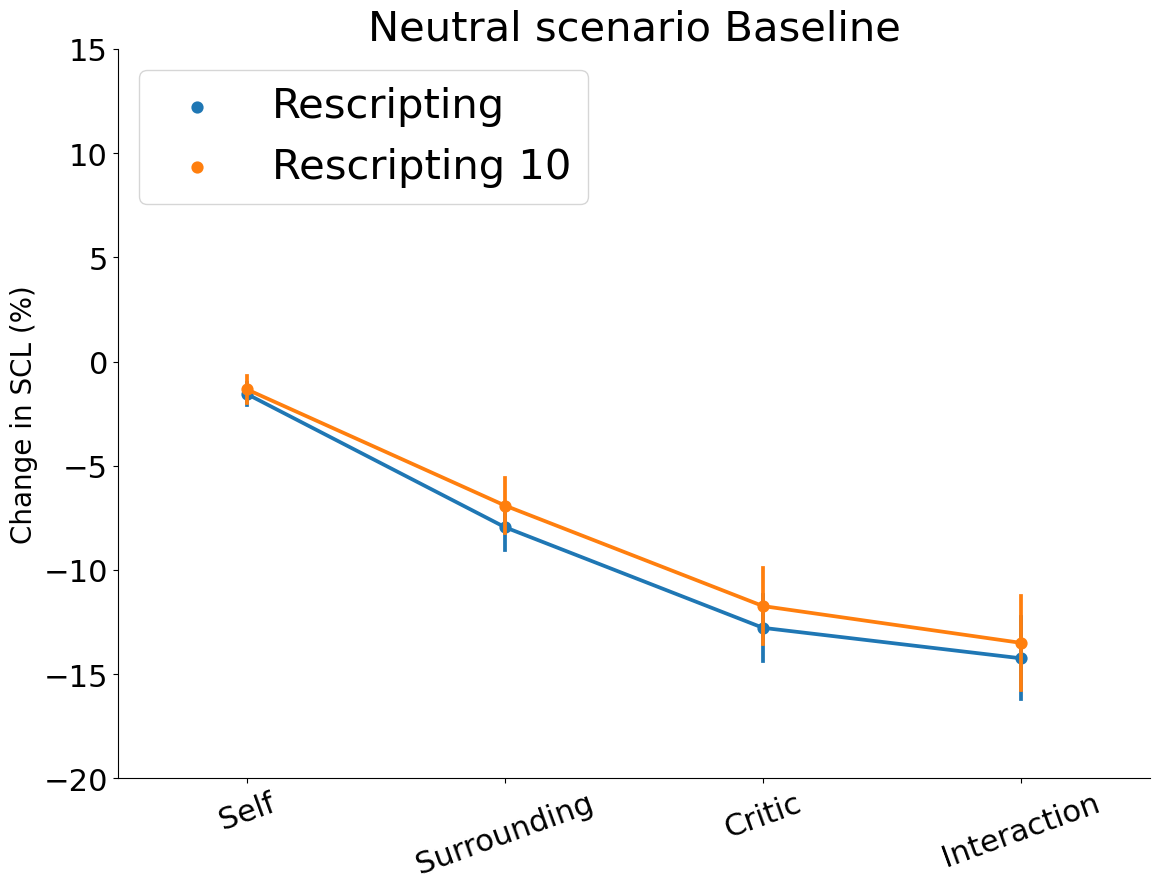

<Figure size 2000x3000 with 0 Axes>

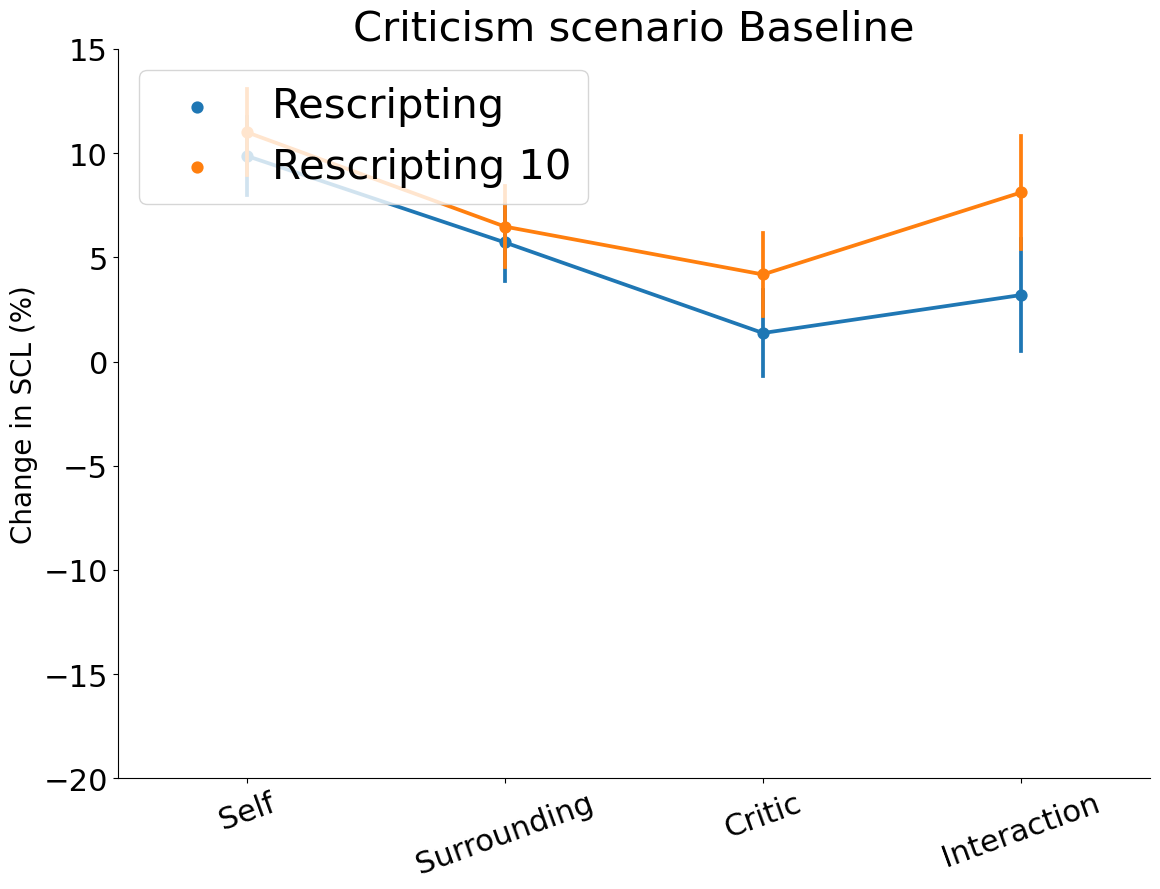

<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

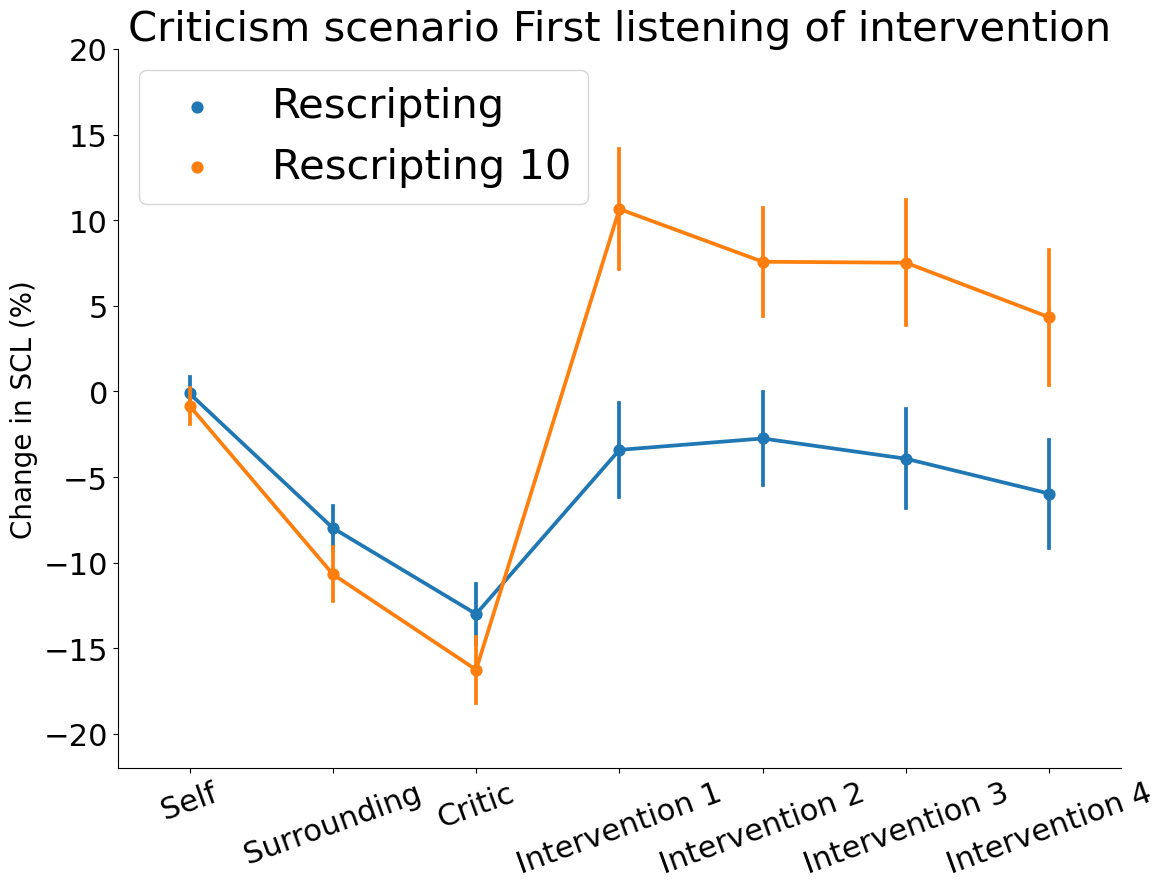

<Figure size 2000x3000 with 0 Axes>

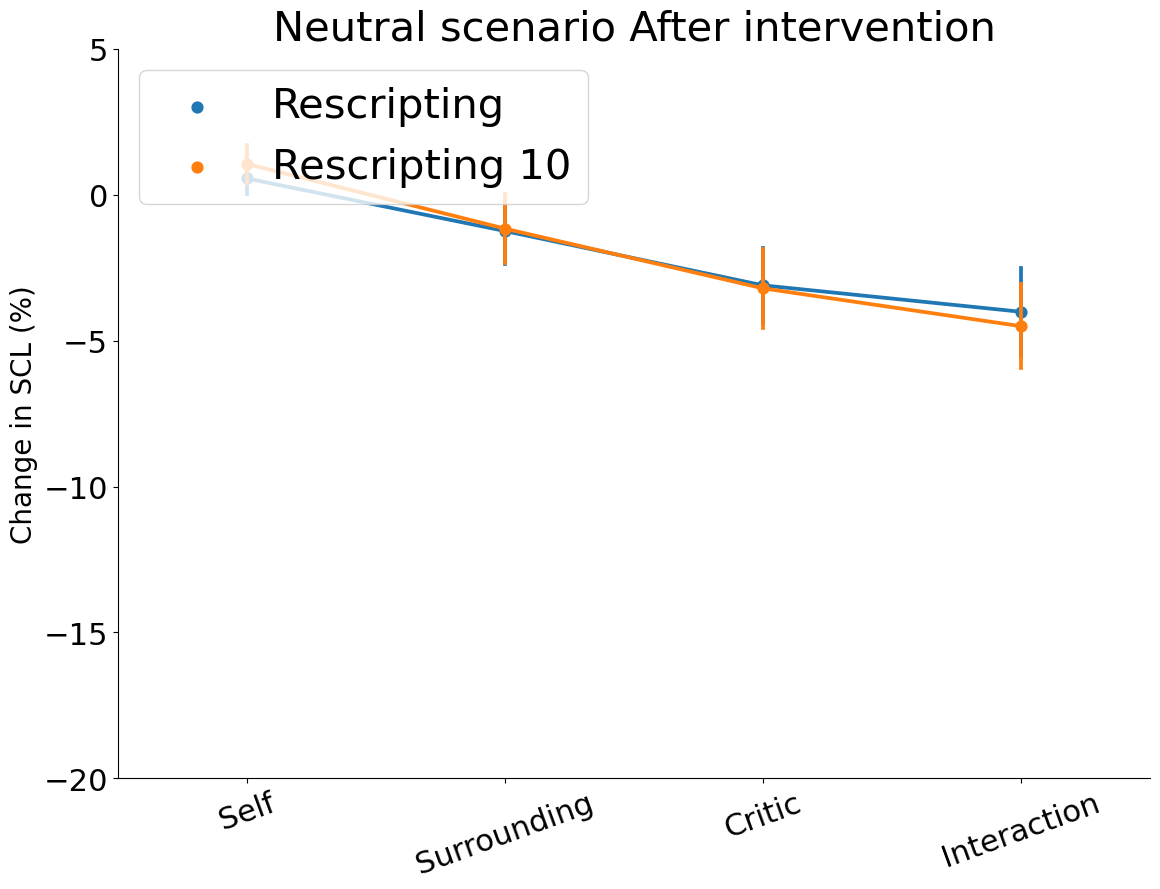

<Figure size 2000x3000 with 0 Axes>

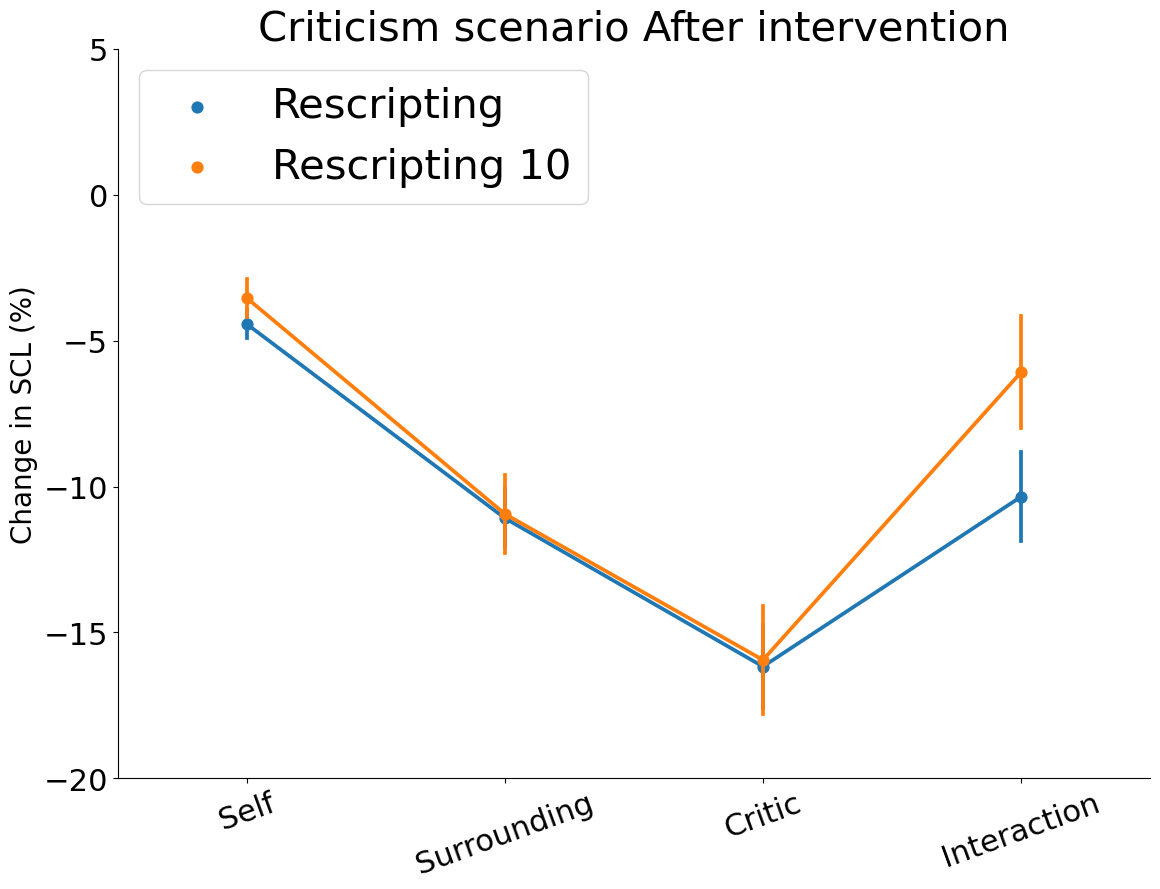

<Figure size 2000x3000 with 0 Axes>

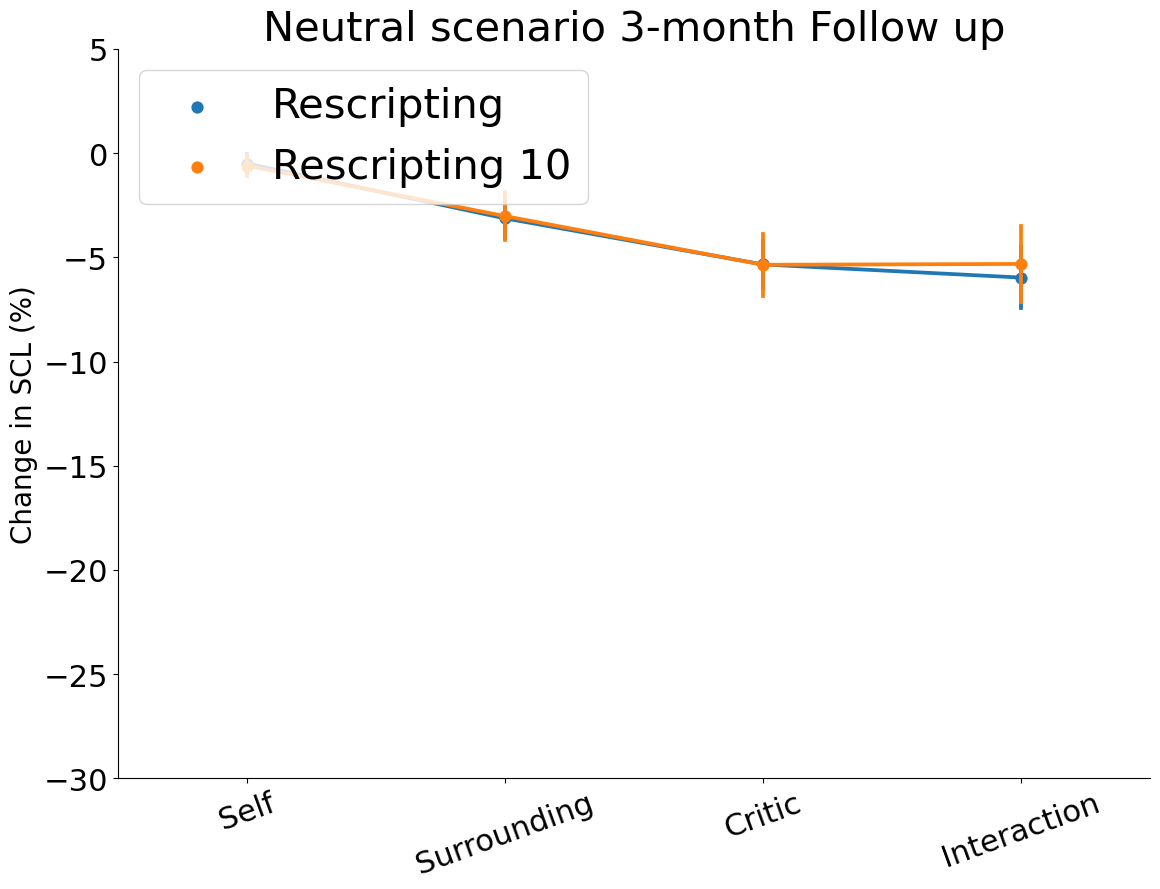

<Figure size 2000x3000 with 0 Axes>

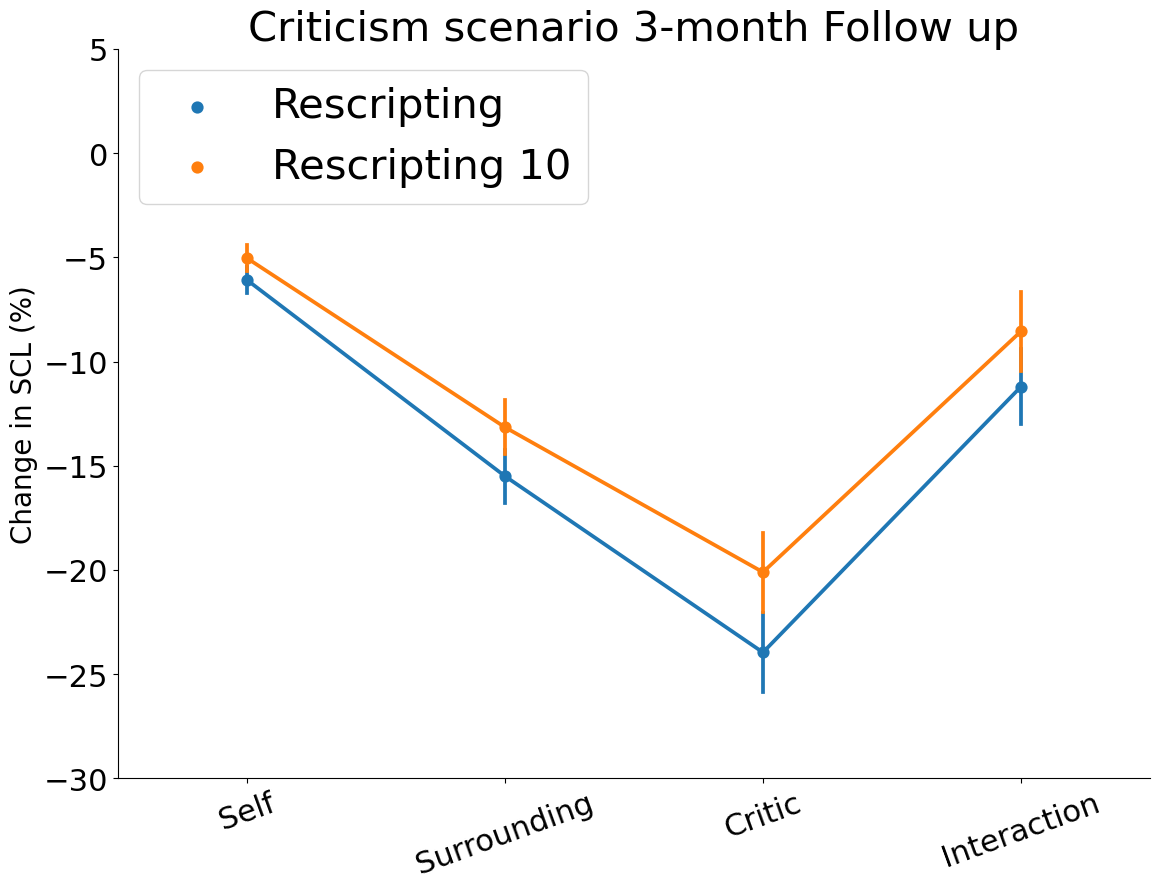

<Figure size 2000x3000 with 0 Axes>

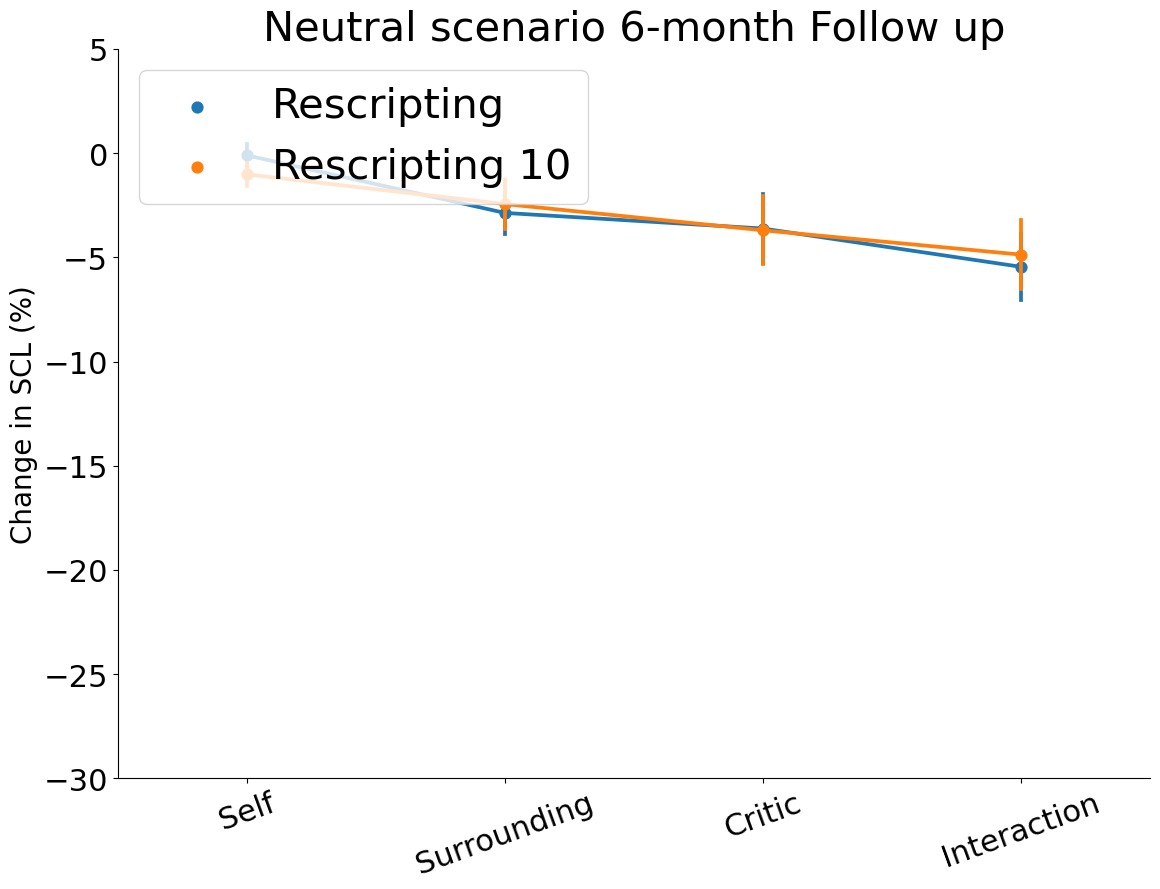

<Figure size 2000x3000 with 0 Axes>

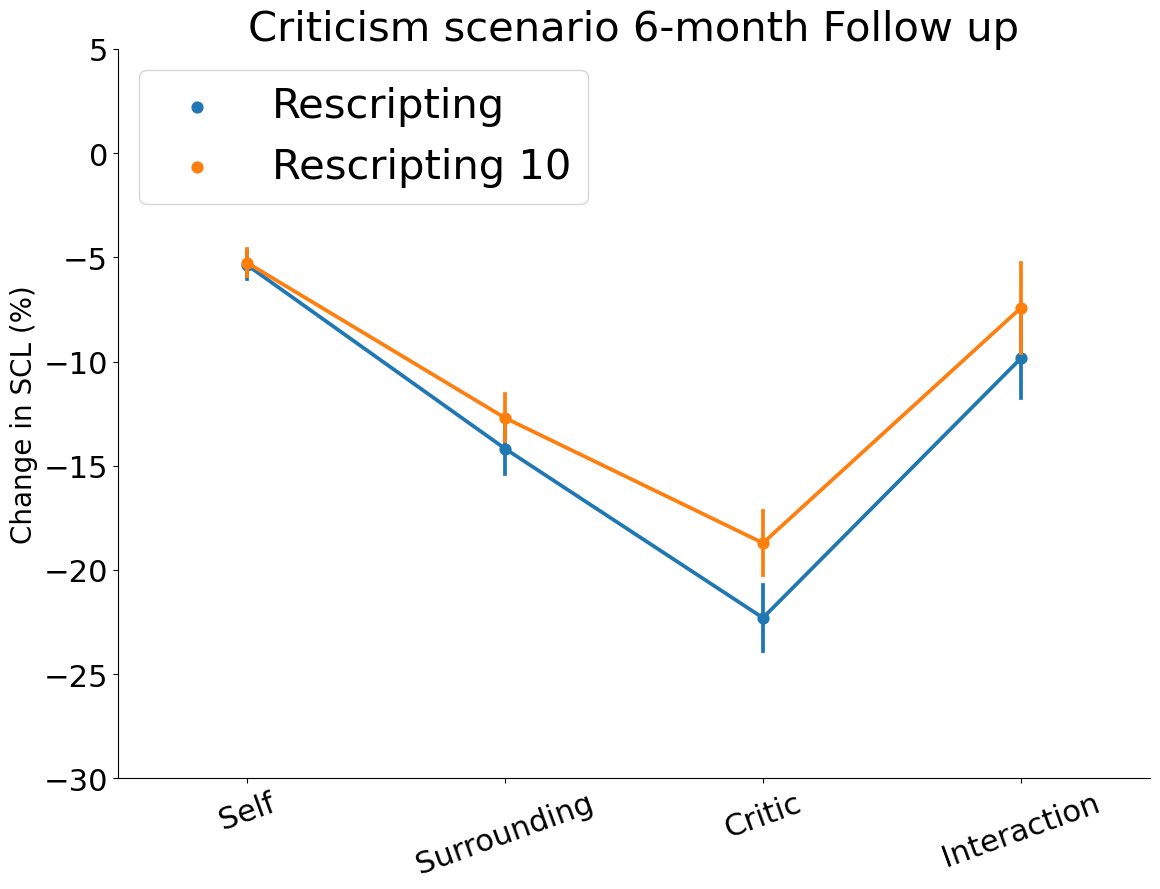

In [2]:
time_point = {'TP1':['Baseline',[-20,15]],
              'TP2':['First listening of intervention',[-22,20]],
              'TP63':['After intervention',[-20,5]],
             'TP73':['3-month Follow up',[-30,5]],
             'TP83':['6-month Follow up',[-30,5]]}
scenario = {'Neut':'Neutral scenario','CritT':'Criticism scenario'}

colset_dict = {'TP1':['Self','Surrounding','Critic','Interaction'],
              'TP2':['Self','Surrounding','Critic','Intervention 1', 'Intervention 2','Intervention 3','Intervention 4'],
              'TP63':['Self','Surrounding','Critic','Interaction'],
              'TP73':['Self','Surrounding','Critic','Interaction'],
              'TP83':['Self','Surrounding','Critic','Interaction']}

tp = 'TP73'
cond = 'Neut'

for tpoint in list(time_point.keys()):
    for scen in list(scenario.keys()):
        try:
            tp = tpoint
            tp_formal = time_point[tp][0]
            scen_formal = scenario[scen]
            cond = scen
            group = group_12
            title = f'{scen_formal} {tp_formal}'
            ylab = 'Change in SCL (%)'

            plt.figure(figsize=(20,30))

            tmp = result.loc[group,result.columns.str.contains(fr'SCL_{tp}_{cond}_P.*')]
            tmp.columns = colset_dict[tpoint]
            tmp['Condition'] = result['Condition_x_first']
            tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
            sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='se'
                        ,height=9, aspect=1.3,legend=False)


            plt.xlabel('',fontsize=20)
            plt.ylabel(ylab,fontsize=20)
            plt.xticks(fontsize=22,rotation=20)
            plt.yticks(fontsize=22)
            plt.title(title,fontsize=30)

            plt.ylim(time_point[tp][1])
            plt.legend(loc='upper left',fontsize=30)

            plt.tight_layout()
            plt.savefig(f'{scen_formal} {tp_formal}.png')
        except:
            pass
plt.show()

C:\Users\skarkosz\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\4249996505.py:43: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 2000x3000 with 0 Axes>

<Figure size 2000x3000 with 0 Axes>

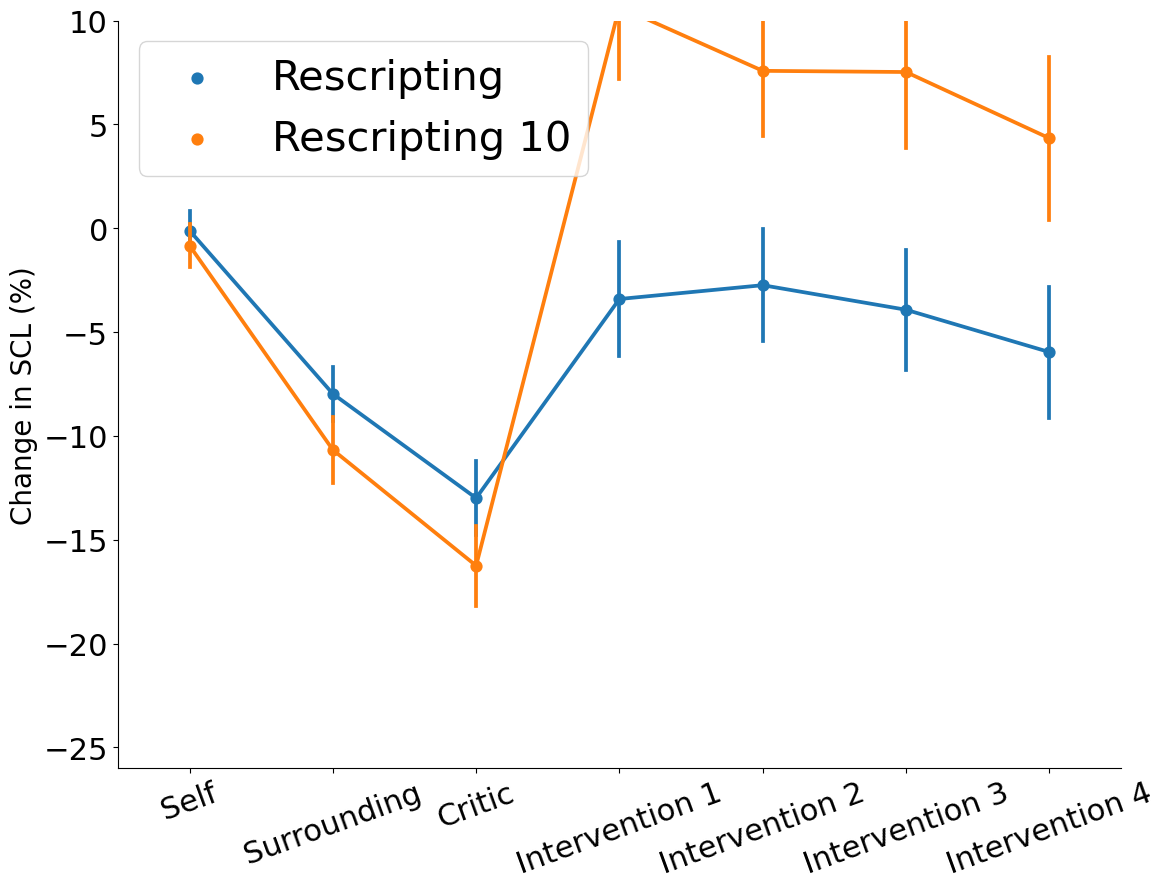

In [3]:
time_point = {'TP2':['First listening of intervention',[-26,10]]}
scenario = {'Neut':'Neutral scenario','CritT':'Criticism scenario'}

colset_dict = {'TP1':['Self','Surrounding','Critic','Interaction'],
              'TP2':['Self','Surrounding','Critic','Intervention 1', 'Intervention 2','Intervention 3','Intervention 4'],
              'TP63':['Self','Surrounding','Critic','Interaction'],
              'TP73':['Self','Surrounding','Critic','Interaction'],
              'TP83':['Self','Surrounding','Critic','Interaction']}

tp = 'TP73'
cond = 'Neut'

for tpoint in list(time_point.keys()):
    for scen in list(scenario.keys()):
        try:
            tp = tpoint
            tp_formal = time_point[tp][0]
            scen_formal = scenario[scen]
            cond = scen
            group = group_12
            title = f'{scen_formal} {tp_formal}'
            ylab = 'Change in SCL (%)'

            plt.figure(figsize=(20,30))

            tmp = result.loc[group,result.columns.str.contains(fr'SCL_{tp}_{cond}_P.*')]
            tmp.columns = colset_dict[tpoint]
            tmp['Condition'] = result['Condition_x_first']
            tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
            sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='se'
                        ,height=9, aspect=1.3,legend=False)


            plt.xlabel('',fontsize=20)
            plt.ylabel(ylab,fontsize=20)
            plt.xticks(fontsize=22,rotation=20)
            plt.yticks(fontsize=22)
#             plt.title(title,fontsize=30)

            plt.ylim(time_point[tp][1])
            plt.legend(loc='upper left',fontsize=30)

            plt.tight_layout()
            plt.savefig(f'{scen_formal} {tp_formal}.png')
        except:
            pass
plt.show()

C:\Users\skarkosz\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skarkosz\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skarkosz\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skarkosz\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\2494543067.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 2000x3000 with 0 Axes>

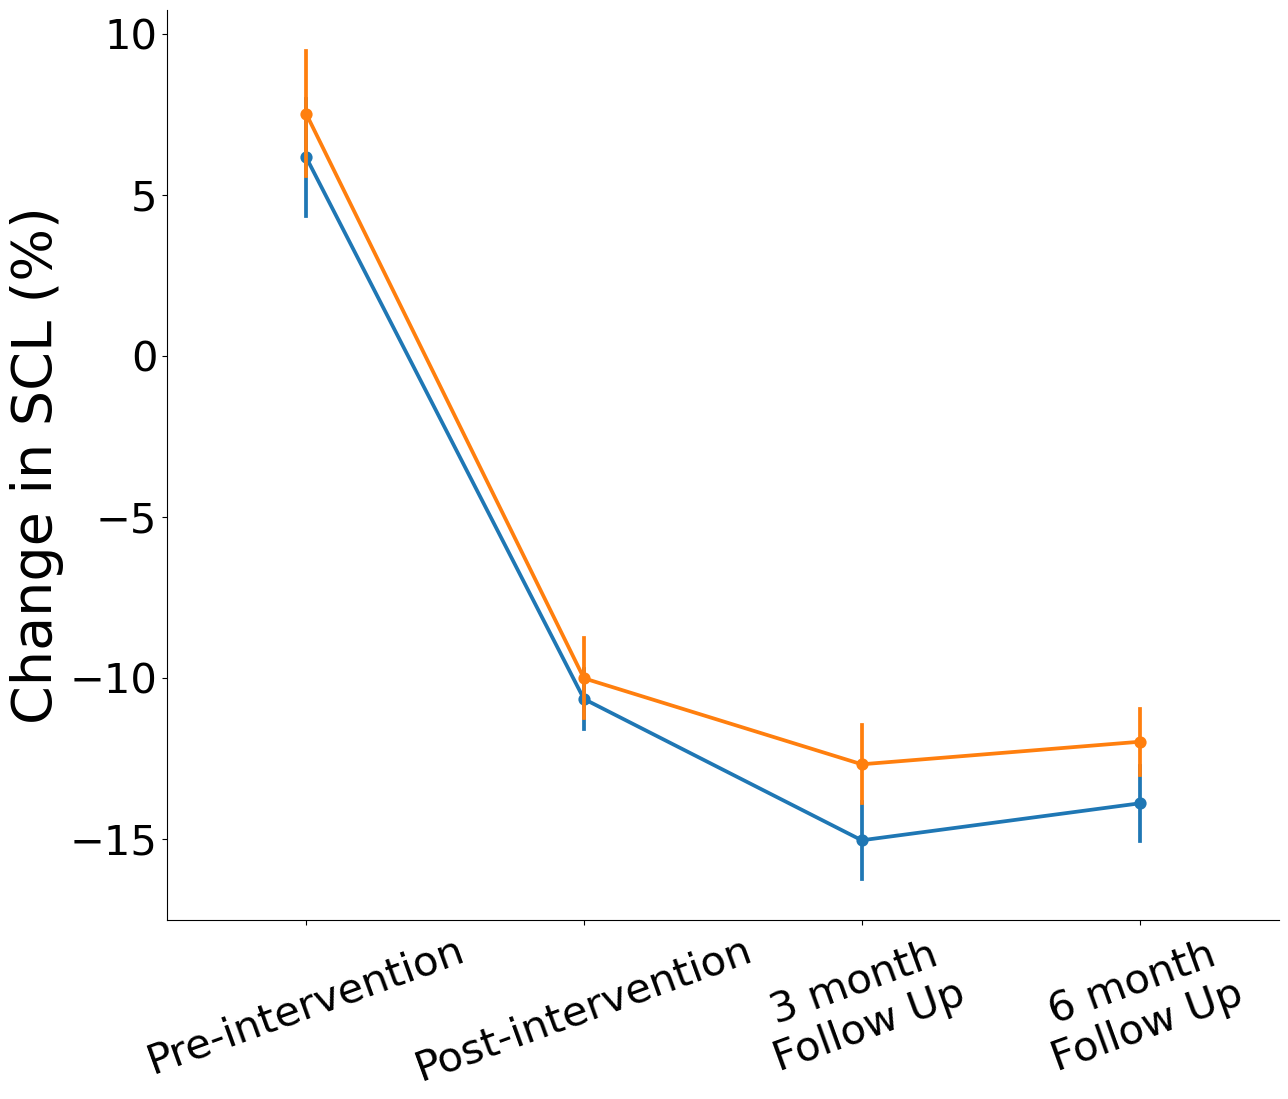

<Figure size 2000x3000 with 0 Axes>

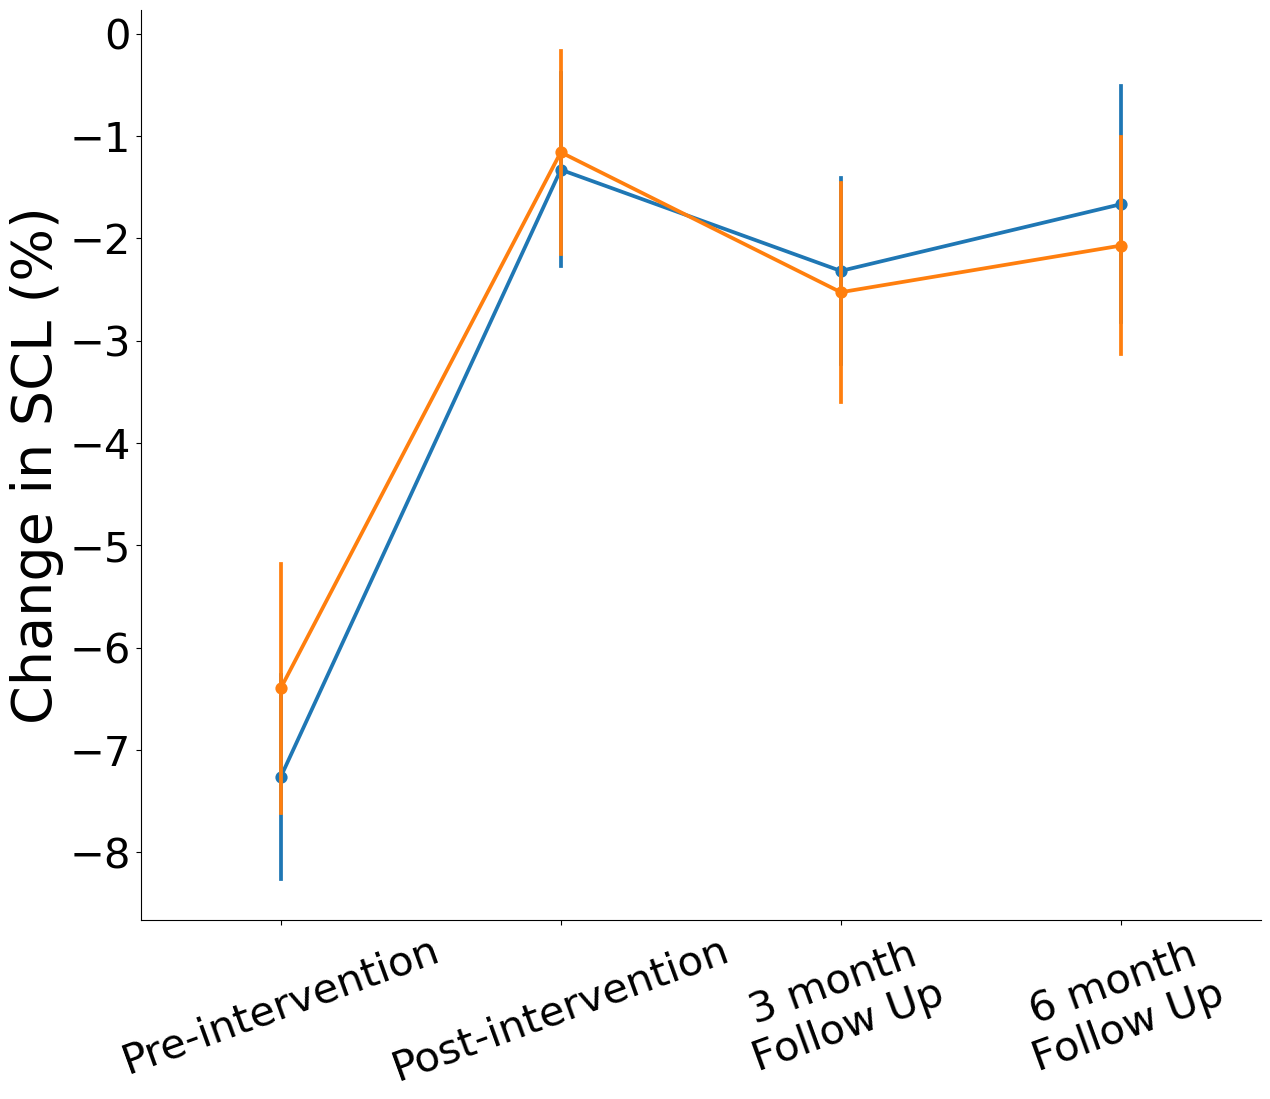

<Figure size 2000x3000 with 0 Axes>

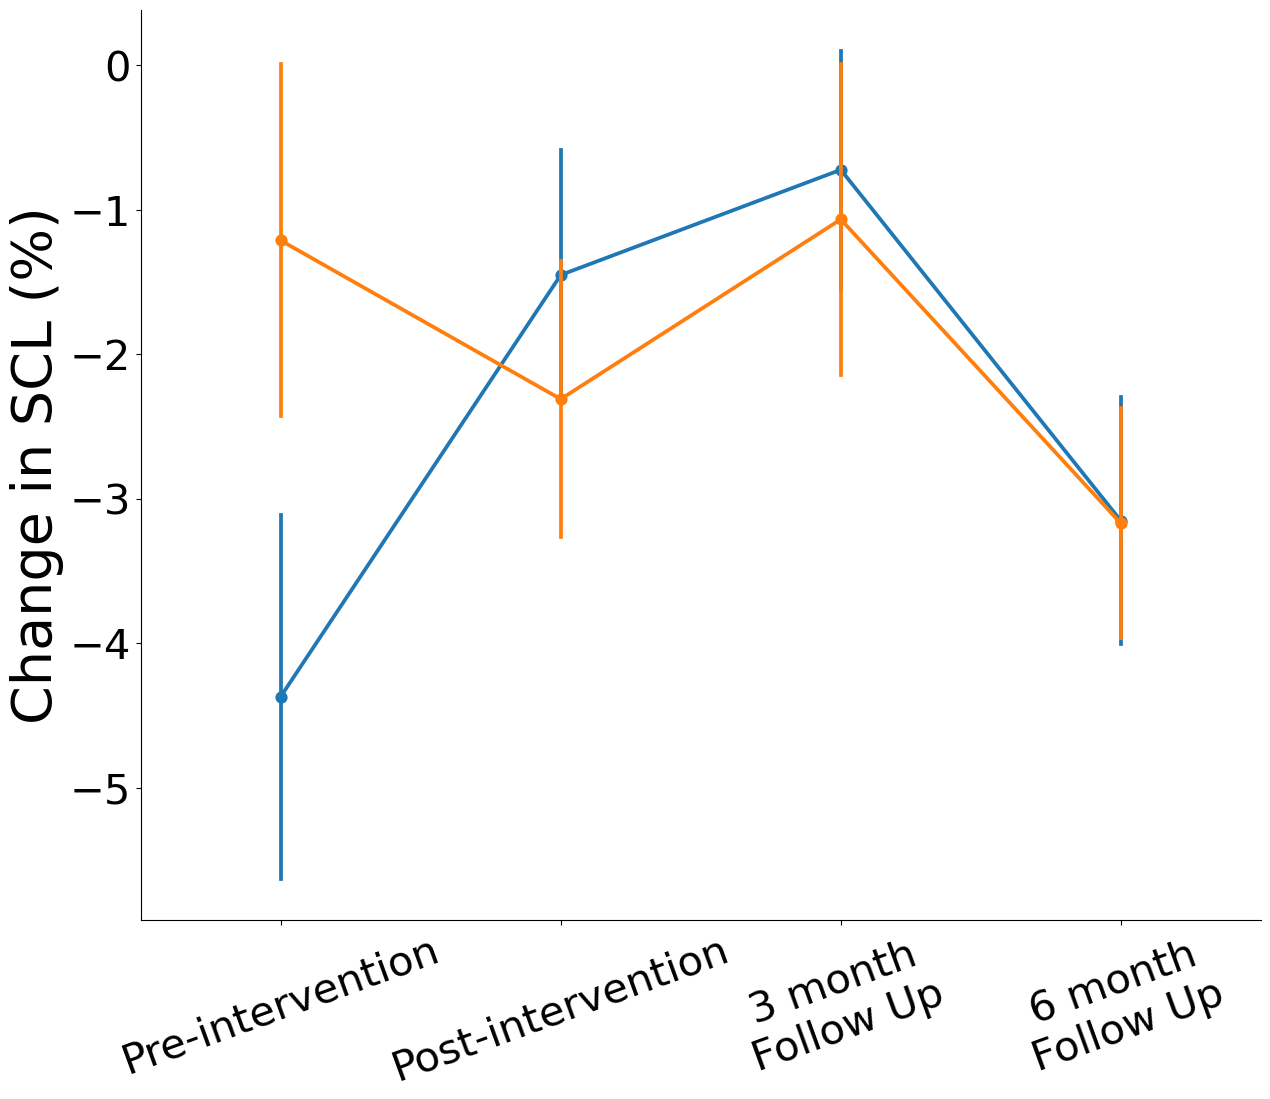

<Figure size 2000x3000 with 0 Axes>

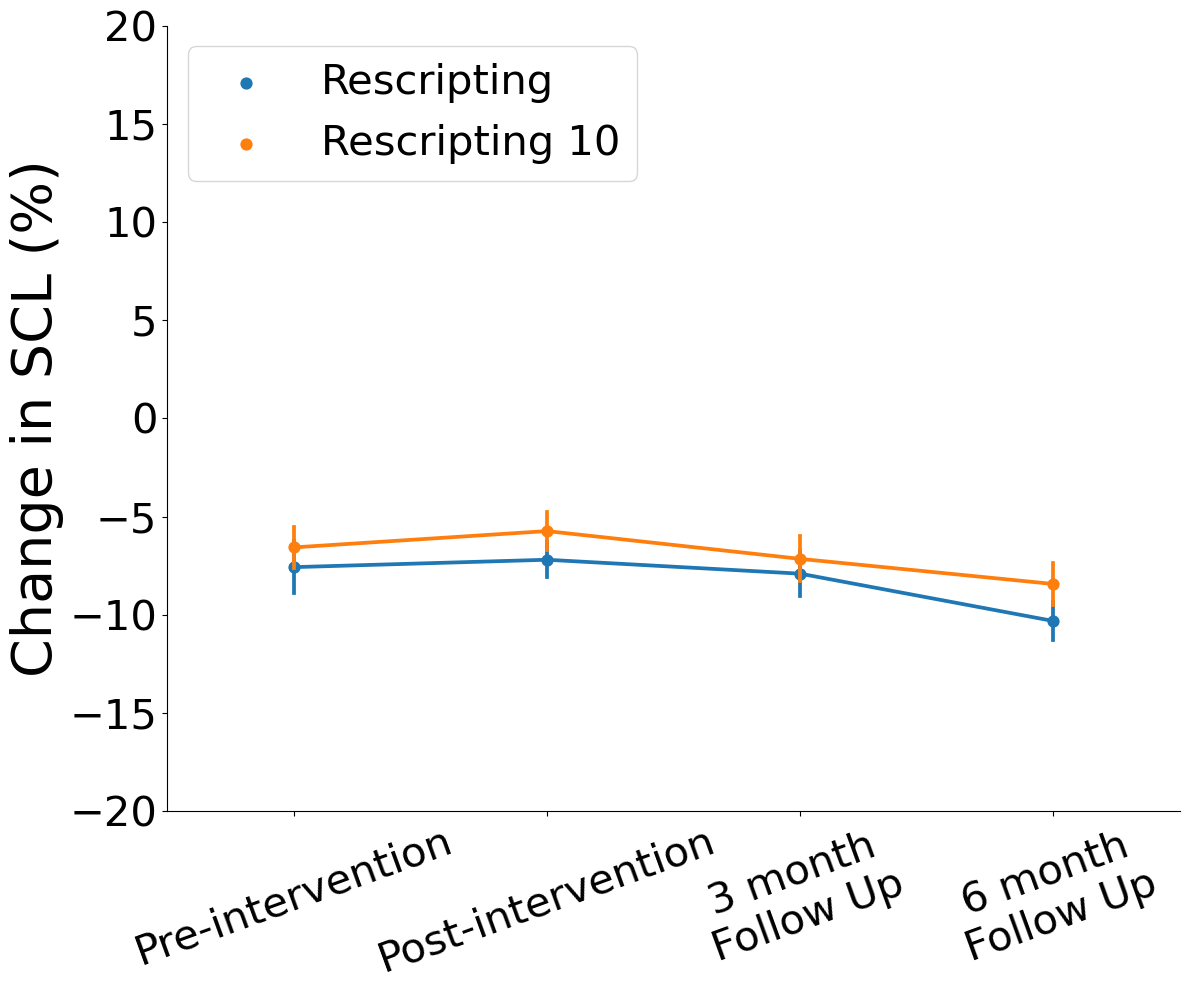

In [4]:

cond = 'Neut'
group = group_12
title = f'{scen_formal} {tp_formal}'
for cond in ['CritT','Neut','Neg','Crit']:
    post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
    ylab = 'Change in SCL (%)'
    post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
    colnames = ['Pre-intervention','Post-intervention','3 month\nFollow Up','6 month\nFollow Up']
    # colnames = ['Pomiar bazowy','Po interwencji']
    part_suspence='suspence'
    title = f'{cond} scenario reactivation'

    plt.figure(figsize=(20,30))

    tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
    # tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP\d_{cond}_{part_suspeaance}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]

    # tmp.columns = ['Ja','Otoczenie','Krytyk','Interwencja 1','Interwencja 2','Interwencja 3','Interwencja 4']
    tmp.columns = colnames
    tmp['Condition'] = result['Condition_x_first']
    tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
    sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='se',height=10, aspect=1.2,legend=False)


    plt.xlabel('',fontsize=40)
    plt.ylabel(ylab,fontsize=40)
    plt.xticks(fontsize=30,rotation=20)
    plt.yticks(fontsize=30)
    # plt.title(title,fontsize=30)

plt.ylim([-20,20])
plt.legend(loc='upper left',fontsize=30)

plt.tight_layout()
plt.savefig(f'{title}.png')

C:\Users\skarkosz\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\999245727.py:33: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 2000x3000 with 0 Axes>

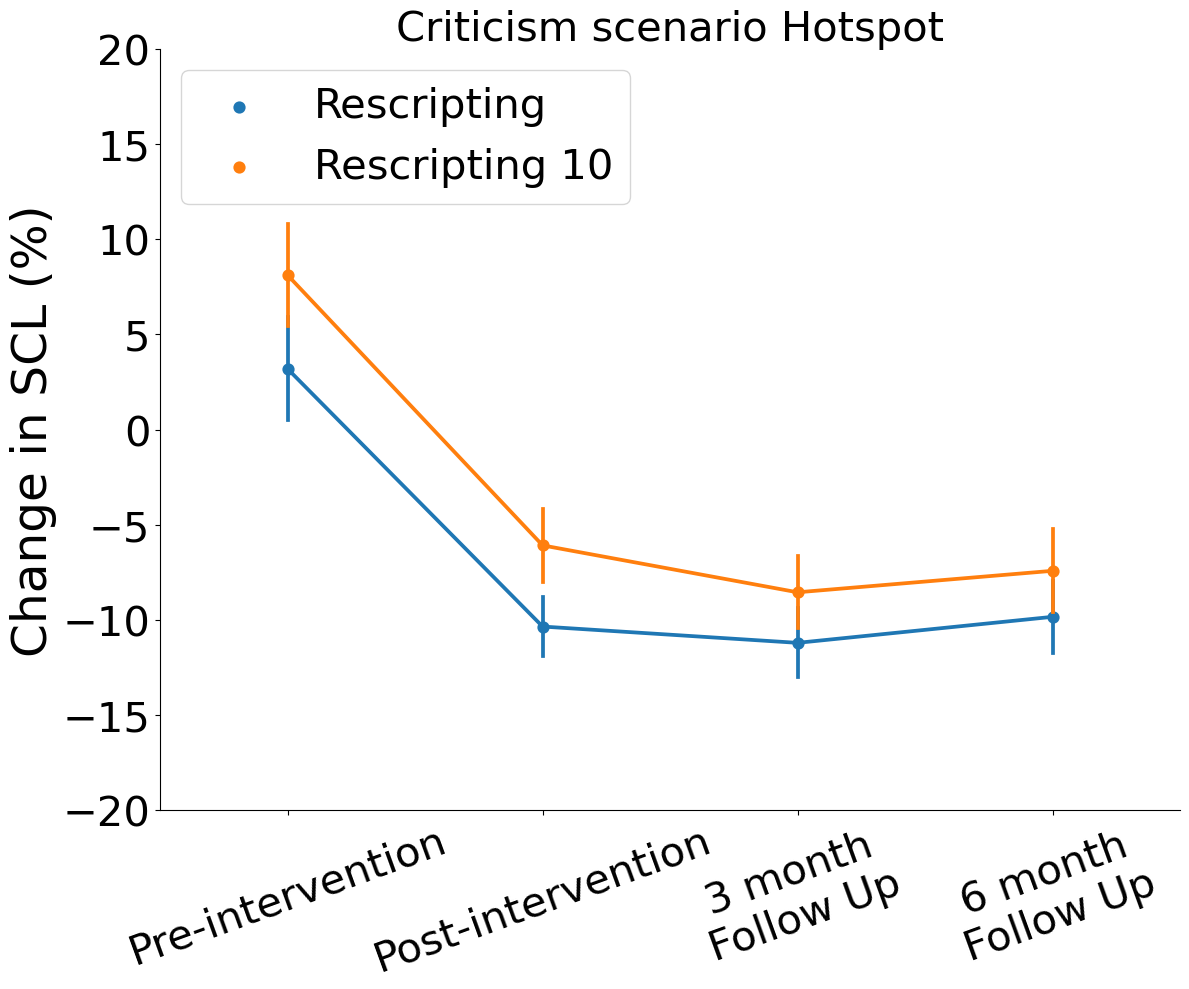

In [21]:

cond = 'CritT'
group = group_12
title = f'{scen_formal} {tp_formal}'
ylab = 'Change in SCL (%)'
post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
colnames = ['Pre-intervention','Post-intervention','3 month\nFollow Up','6 month\nFollow Up']
# colnames = ['Pomiar bazowy','3 mies.\nFollow Up']
# colnames = ['Pomiar bazowy','Po interwencji']
part_suspence='P4'
title = f'Criticism scenario Hotspot'

plt.figure(figsize=(20,30))

tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
# tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP\d_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]

# tmp.columns = ['Ja','Otoczenie','Krytyk','Interwencja 1','Interwencja 2','Interwencja 3','Interwencja 4']
tmp.columns = colnames
tmp['Condition'] = result['Condition_x_first']
tmp_melted  = tmp.melt(id_vars=['Condition'],value_vars=tmp.columns[:-1])
sns.catplot(kind='point',x='variable',y='value',hue='Condition',data=tmp_melted,errorbar='se',height=10, aspect=1.2,legend=False)


plt.xlabel('',fontsize=35)
plt.ylabel(ylab,fontsize=35)
plt.xticks(fontsize=30,rotation=20)
plt.yticks(fontsize=30)
plt.title(title,fontsize=30)

plt.ylim([-20,20])
plt.legend(loc='upper left',fontsize=30)

plt.tight_layout()
plt.savefig(f'{title}.png')

C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\995503143.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(121)


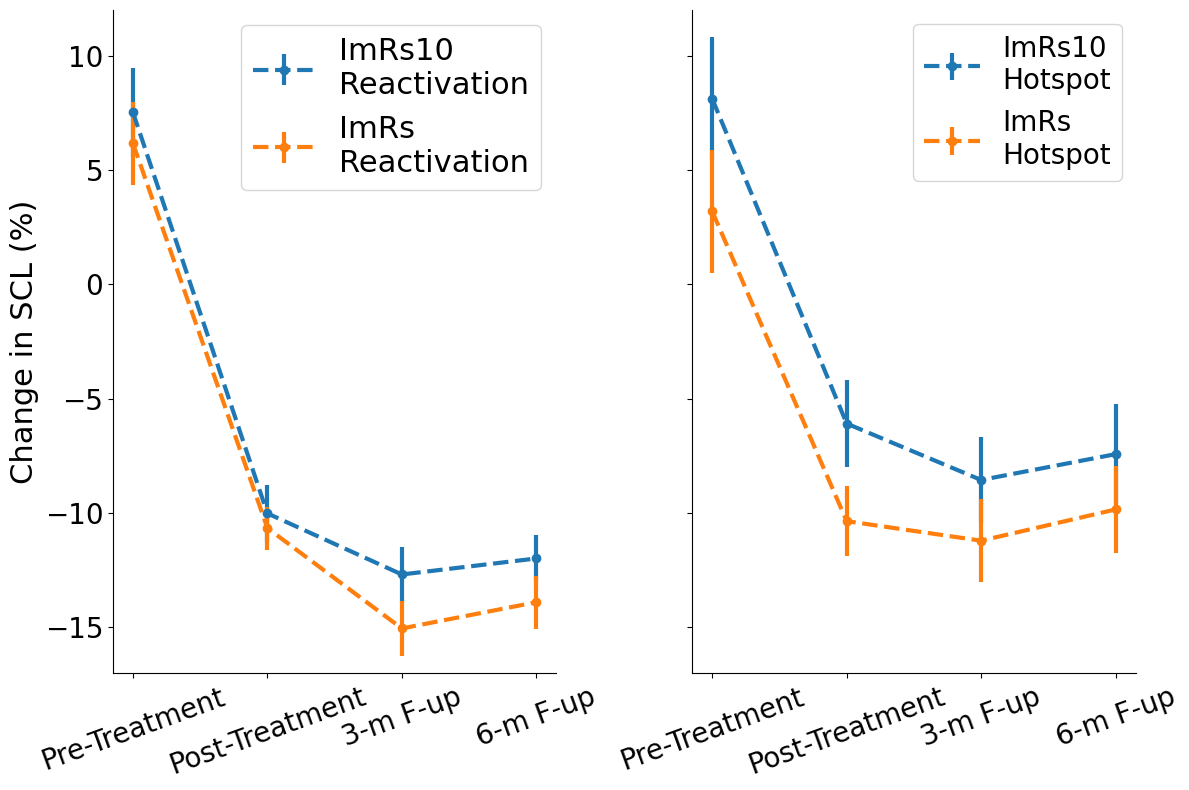

In [22]:
# Prepare all parameters

pd.options.mode.chained_assignment = None
ylab = 'Change in SCL (%)'
post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
colnames = ['Pre-intervention','Post-intervention','3 month\nFollow Up','6 month\nFollow Up']

X = np.arange(4)

#Plot subplots
fig, ax = plt.subplots(2,1,figsize=[12,8])

#Prepare Dataset
part_suspence='suspence'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP[1,6,7,8]_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
tmp.columns = colnames

#actual plot
ax1 = plt.subplot(121)
ax1.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',label='ImRs10\nReactivation',linewidth=3)
ax1.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group1,:],group1), 
             fmt='--o',label='ImRs\nReactivation',linewidth=3)


#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.ylabel(ylab,fontsize=22)
plt.legend(loc='upper right',fontsize=22)
plt.yticks(fontsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

#Prepare Dataset
part_suspence='P4'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
tmp.columns = colnames



#actual plot
ax2 = plt.subplot(122,sharey=ax1)
plt.tick_params('y',labelleft=False)
# plt.plot(tmp.loc[group1,:].mean(),label='ImRs')

# plt.plot(tmp.loc[group2,:].mean(),label='ImRs10')
ax2.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',
             label='ImRs10\nHotspot',
            linewidth=3)
ax2.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), 
             yerr=get_sterror(tmp.loc[group1,:],group1), fmt='--o',label='ImRs\nHotspot',linewidth=3)

#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)



plt.legend(loc='upper right',fontsize=20)


plt.tight_layout()
plt.savefig('Reactivation_hotspot_CritT.png')

C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\3197160802.py:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(141)


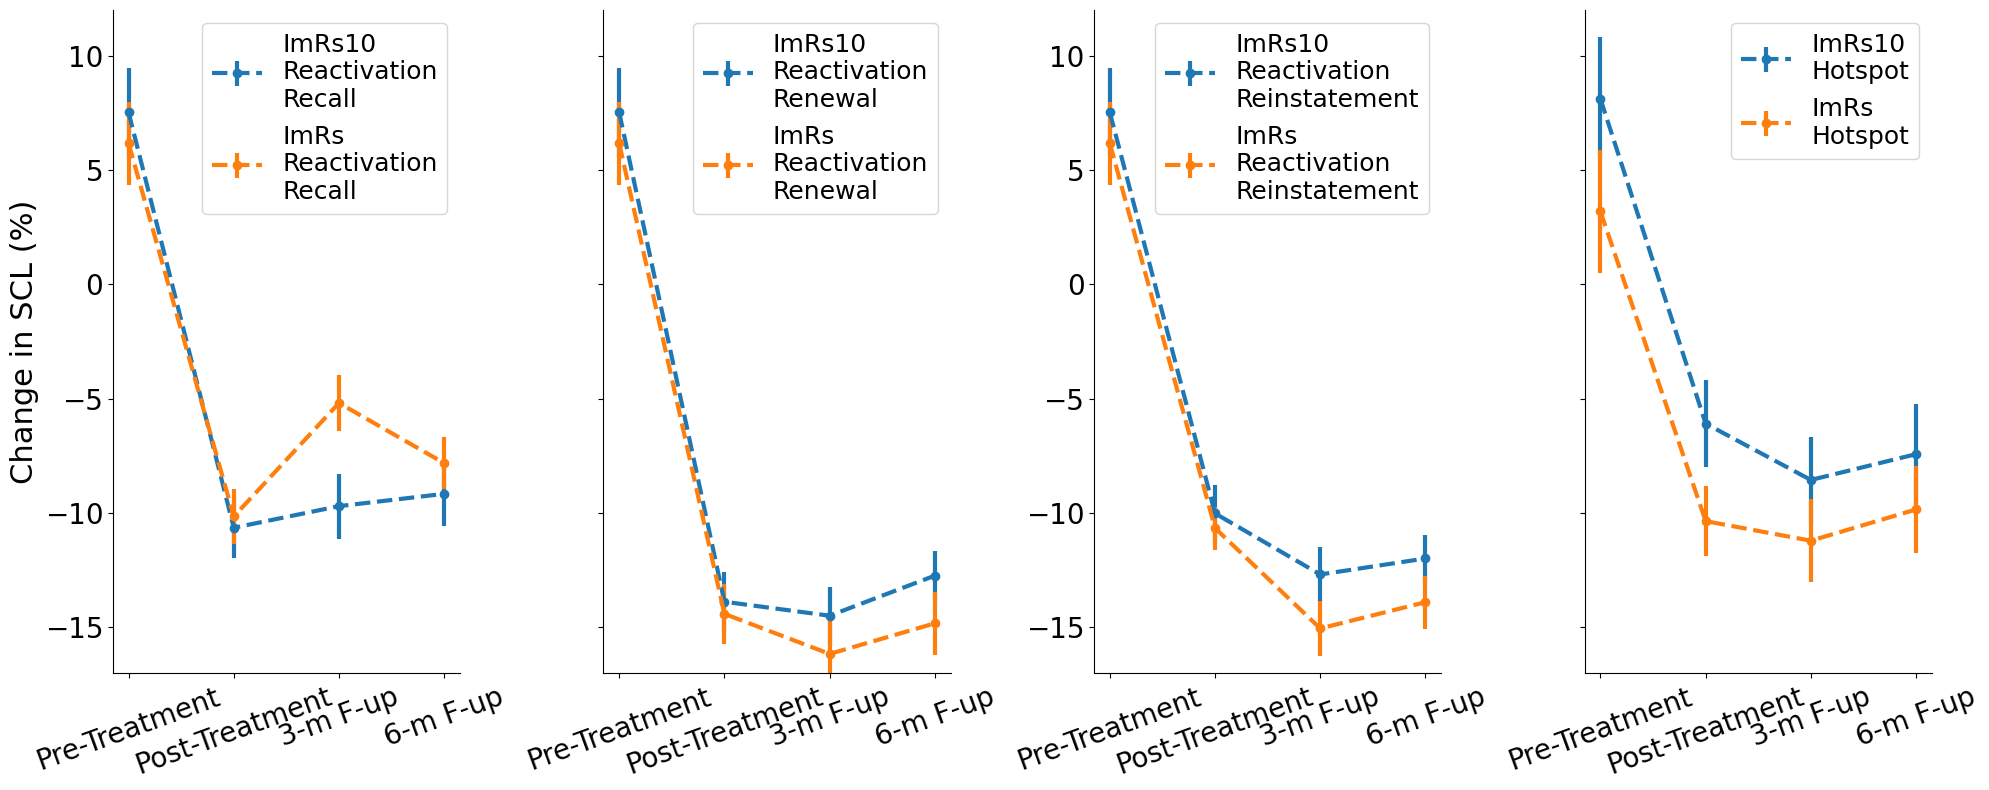

In [33]:
# Prepare all parameters

pd.options.mode.chained_assignment = None
ylab = 'Change in SCL (%)'
post_time_point= '1678' # przyjmuje albo 6,7 albo 67, wtedy trzeba wklepać odpowiednie nazwy kolumn pod spodem
colnames = ['Pre-intervention','Post-intervention','3 month\nFollow Up','6 month\nFollow Up']

X = np.arange(4)

#Plot subplots
fig, ax = plt.subplots(4,1,figsize=[20,8])

#Prepare Dataset
part_suspence='suspence'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP[1,6,7,8]_{cond}_{part_suspence}|SCL_TP[{post_time_point}][1]_{cond}_{part_suspence}')]
tmp.columns = colnames

#actual plot
ax1 = plt.subplot(141)
ax1.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',label='ImRs10\nReactivation\nRecall',linewidth=3)
ax1.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group1,:],group1), 
             fmt='--o',label='ImRs\nReactivation\nRecall',linewidth=3)


#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.ylabel(ylab,fontsize=22)
plt.legend(loc='upper right',fontsize=18)
plt.yticks(fontsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)


#Prepare Dataset
part_suspence='suspence'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP[1,6,7,8]_{cond}_{part_suspence}|SCL_TP[{post_time_point}][2]_{cond}_{part_suspence}')]
tmp.columns = colnames

#actual plot
ax2 = plt.subplot(142,sharey=ax1)
plt.tick_params('y',labelleft=False)
ax2.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',label='ImRs10\nReactivation\nRenewal',linewidth=3)
ax2.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group1,:],group1), 
             fmt='--o',label='ImRs\nReactivation\nRenewal',linewidth=3)


#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.legend(loc='upper right',fontsize=18)
plt.yticks(fontsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)



#Prepare Dataset
part_suspence='suspence'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP[1,6,7,8]_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
tmp.columns = colnames

#actual plot
ax3 = plt.subplot(143)
ax3.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',label='ImRs10\nReactivation\nReinstatement',linewidth=3)
ax3.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group1,:],group1), 
             fmt='--o',label='ImRs\nReactivation\nReinstatement',linewidth=3)


#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.legend(loc='upper right',fontsize=18)
plt.yticks(fontsize=20)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)






#Prepare Dataset
part_suspence='P4'
tmp = result.loc[group,result.columns.str.contains(fr'SCL_TP1_{cond}_{part_suspence}|SCL_TP[{post_time_point}][3]_{cond}_{part_suspence}')]
tmp.columns = colnames


#actual plot
ax4 = plt.subplot(144,sharey=ax1)
plt.tick_params('y',labelleft=False)
# plt.plot(tmp.loc[group1,:].mean(),label='ImRs')

# plt.plot(tmp.loc[group2,:].mean(),label='ImRs10')
ax4.errorbar(X, tmp.loc[group2,:].mean(numeric_only=True), yerr=get_sterror(tmp.loc[group2,:],group2), 
             fmt='--o',
             label='ImRs10\nHotspot',
            linewidth=3)
ax4.errorbar(X, tmp.loc[group1,:].mean(numeric_only=True), 
             yerr=get_sterror(tmp.loc[group1,:],group1), fmt='--o',label='ImRs\nHotspot',linewidth=3)

#Additional features of plot
plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-m F-up','6-m F-up'],
           fontsize=20,
           rotation=20)
plt.ylim([-17,12])
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)



plt.legend(loc='upper right',fontsize=18)


plt.tight_layout()
plt.savefig('Reactivation_hotspot_CritT.png')

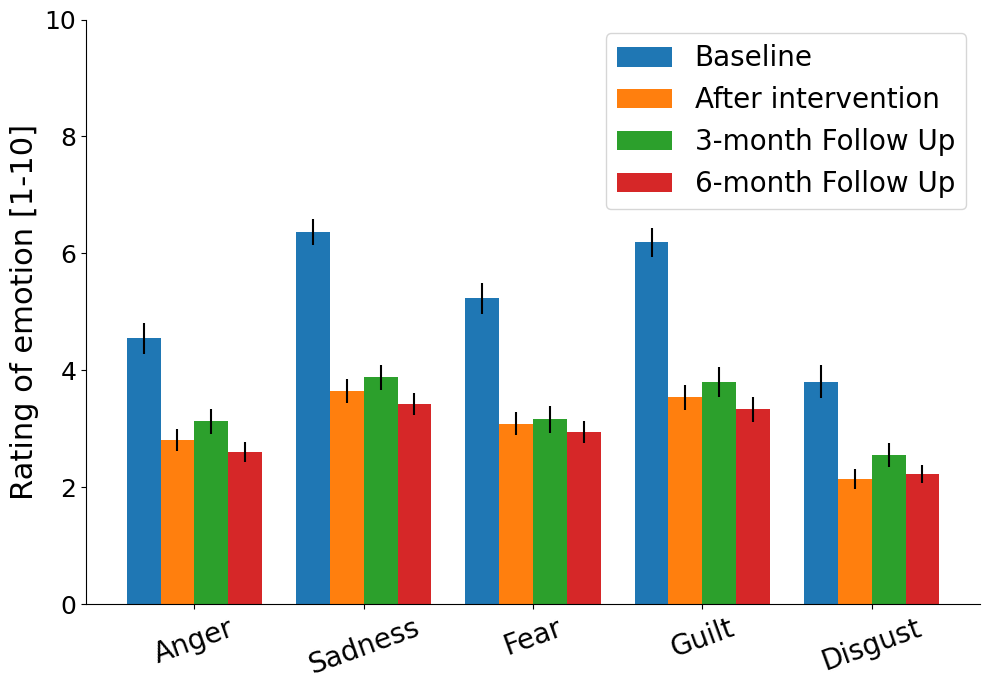

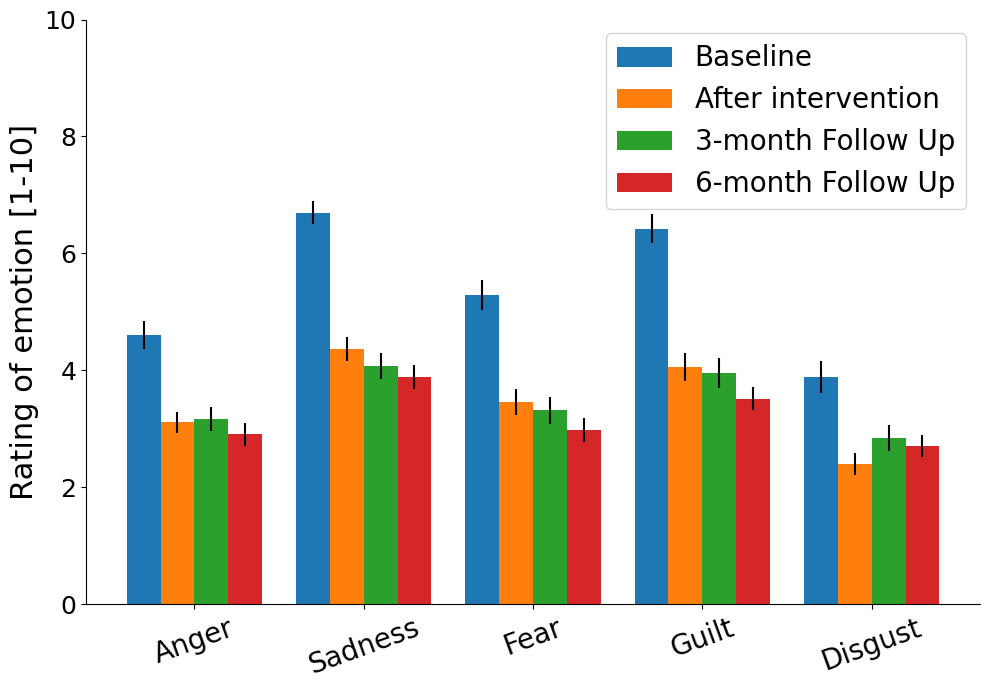

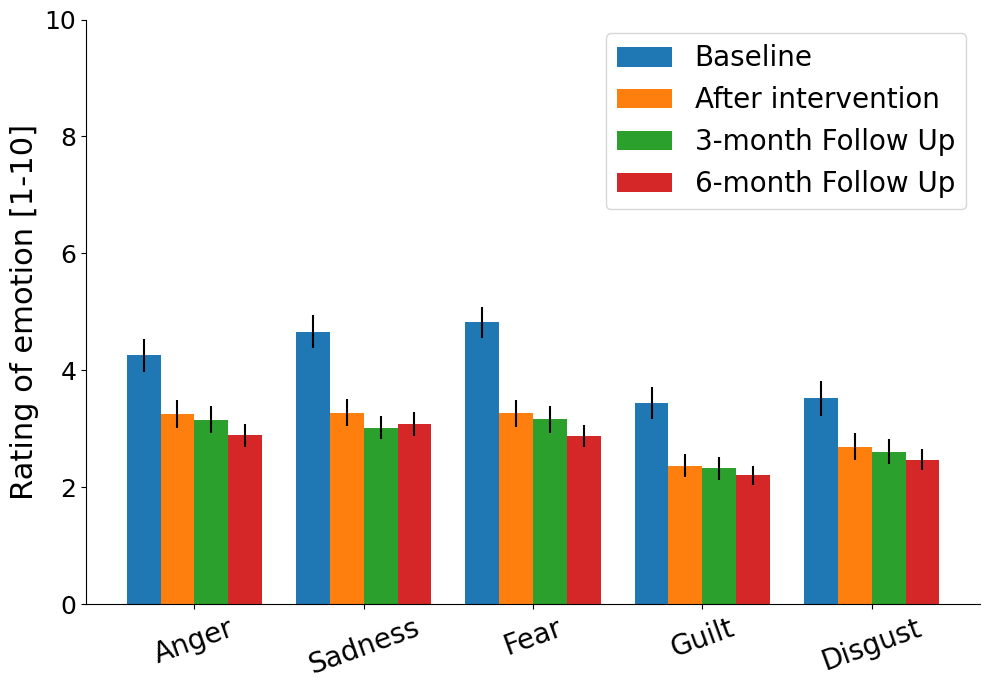

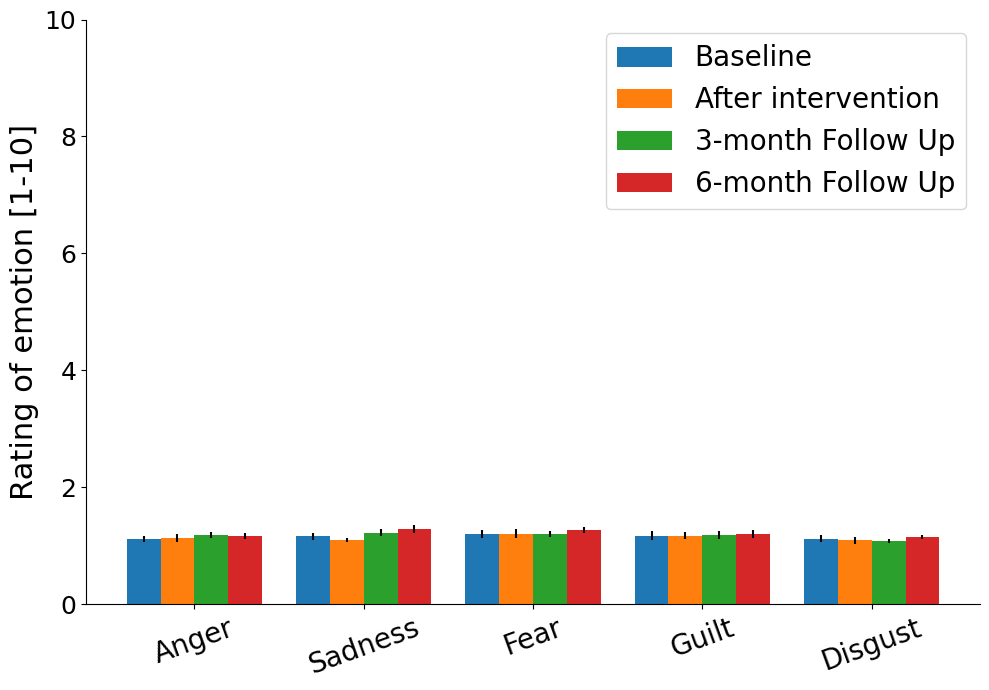

In [7]:
# part = 'suspence_mean'
part = '4'
cond = 'Neut'

for cond in ['CritT','Crit','Neg','Neut']:
    tp1 = result.loc[:,result.columns.str.contains(fr'rat_TP1_{cond}_.*{part}')].iloc[:,3:-2]
    tp2 = result.loc[:,result.columns.str.contains(fr'rat_TP2_{cond}_.*{part}')].iloc[:,3:-2]
    tp3 = result.loc[:,result.columns.str.contains(fr'rat_TP3_{cond}_.*{part}')].iloc[:,3:-2]
    tp4 = result.loc[:,result.columns.str.contains(fr'rat_TP4_{cond}_.*{part}')].iloc[:,3:-2]

    tp5 = result.loc[:,result.columns.str.contains(fr'rat_TP5_{cond}_.*{part}')].iloc[:,3:-2]
    tp6 = result.loc[:,result.columns.str.contains(fr'rat_TP6_{cond}_.*{part}')].iloc[:,3:-2]
    tp7 = result.loc[:,result.columns.str.contains(fr'rat_TP7_{cond}_.*{part}')].iloc[:,3:-2]
    tp8 = result.loc[:,result.columns.str.contains(fr'rat_TP8_{cond}_.*{part}')].iloc[:,3:-2]


    fig = plt.figure(figsize=[10,7])
    X = np.arange(len(tp1.T))

    plt.bar(X-0.3,tp1.loc[group_12,:].mean(),0.2,label='Baseline',yerr=get_sterror(tp1,group_12))

    plt.bar(X-0.1,tp6.loc[group_12,:].mean(),0.2,label='After intervention',yerr=get_sterror(tp6,group_12))

    plt.bar(X+0.1,tp7.loc[group_12,:].mean(),0.2,label='3-month Follow Up',yerr=get_sterror(tp7,group_12))

    plt.bar(X+0.3,tp8.loc[group_12,:].mean(),0.2,label='6-month Follow Up',yerr=get_sterror(tp8,group_12))


    plt.xticks(X, ['Anger','Sadness','Fear','Guilt','Disgust'],fontsize=20,rotation=20)
    plt.yticks(fontsize=18)
    plt.legend(fontsize = 20)
    # plt.title('Emotions rating of treated criticism scenario during hotspot',fontsize=20)
    plt.ylabel('Rating of emotion [1-10]',fontsize=22)
    plt.ylim([0,10])

    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['top'].set_visible(False)


    plt.tight_layout()
    plt.savefig(f'Emotions_rating_{cond}_hotspot.png')

C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\3910016760.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_(CritT|Crit|Neg|Neut)_.*{part}_{modality}*')]
C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\3910016760.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_(CritT|Crit|Neg|Neut)_.*{part}_{modality}*')]
C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\3910016760.py:11: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_(CritT|Crit|Neg|Neut)_.*{part}_{modality}*')]
C:\User

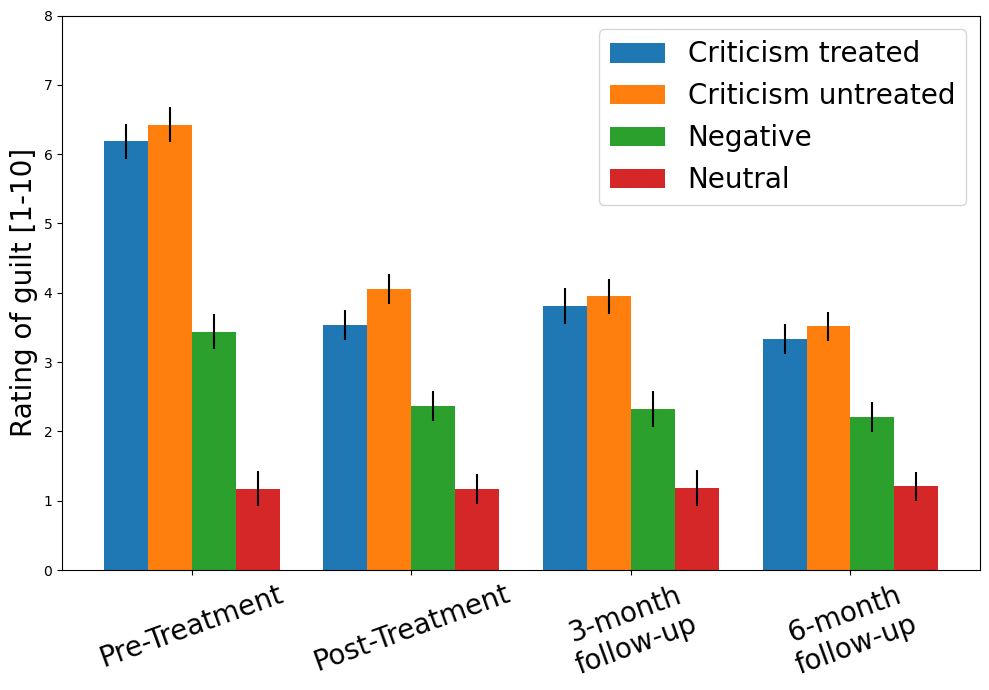

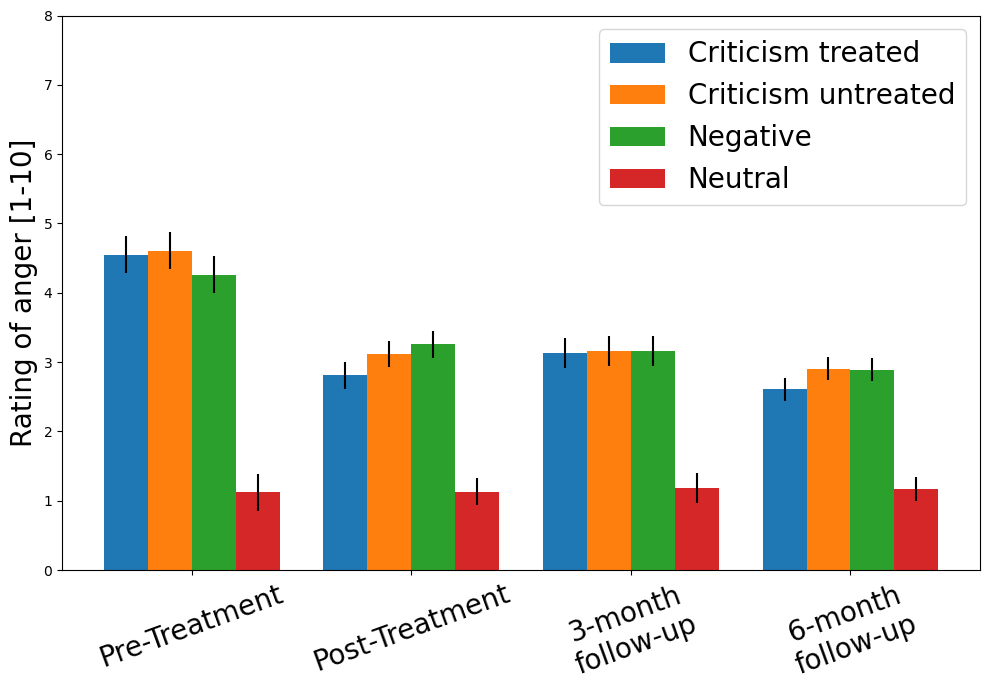

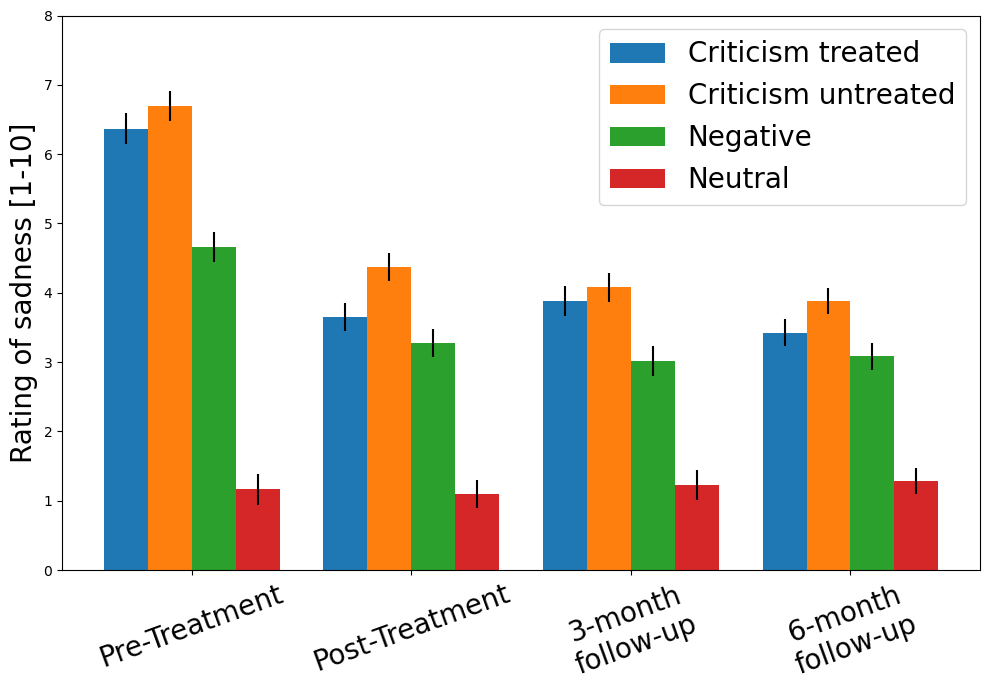

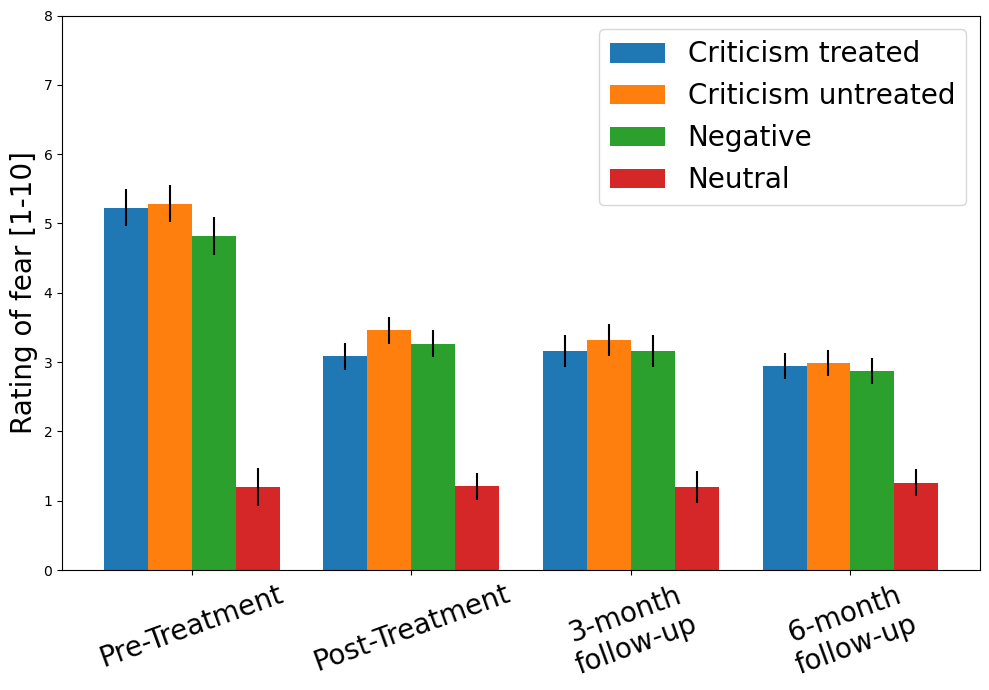

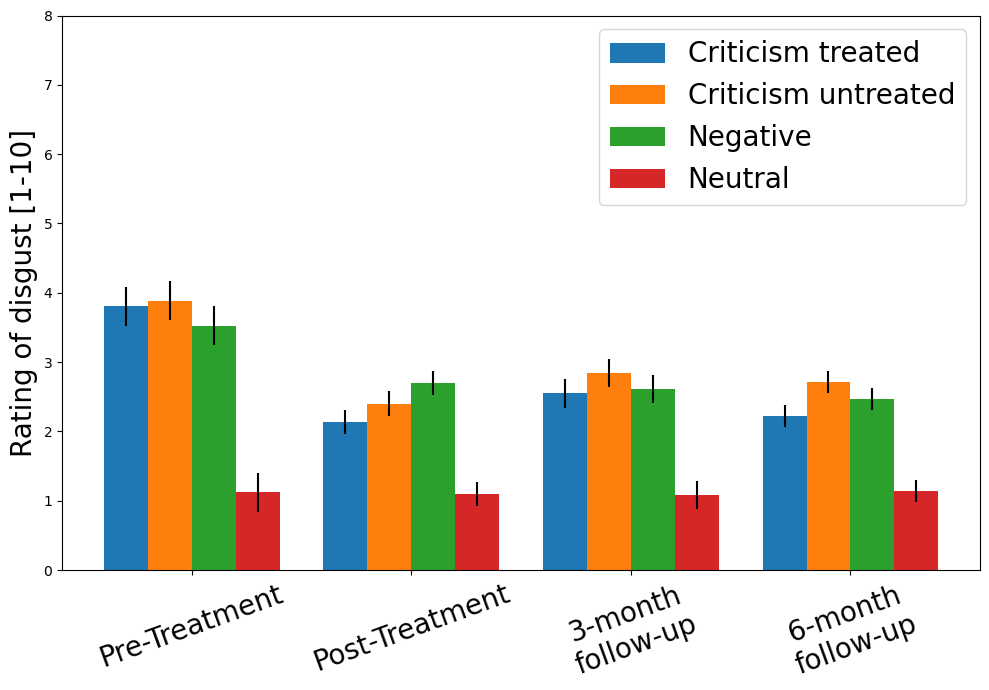

In [8]:
#Set which part of scenario, and which modality
part = 'P4'

modality='GUI'
label='guilt'

#Get rid of redundant warning
pd.options.mode.chained_assignment = None
for modality,label in zip(['GUI','ANG','SAD','FEA','DIS'],['guilt','anger','sadness','fear','disgust']):

    arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_(CritT|Crit|Neg|Neut)_.*{part}_{modality}*')]

    plt.figure(figsize=[10,7])
    X = np.arange(4)

    plt.bar(X-0.3,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')].mean(),0.2,label='Criticism treated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
    plt.bar(X-0.1,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Crit_')].mean(),0.2,label='Criticism untreated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
    plt.bar(X+0.1,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neg')].mean(),0.2,label='Negative',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
    plt.bar(X+0.3,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neut')].mean(),0.2,label='Neutral',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))


    plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
    plt.legend(fontsize = 20)
    # plt.title('Arousal rating for each scenario at each time point\nduring hotspot',fontsize=20)
    plt.ylabel(f'Rating of {label} [1-10]',fontsize=20)
    plt.ylim([0,8])

    plt.tight_layout()
    plt.savefig(f'Emotions_rating_diff_scenario_hotspot_{modality}.png')

# Plotting arousal

C:\Users\skarkosz\AppData\Local\Temp\ipykernel_1700\1186812933.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_(CritT|Crit|Neg|Neut)_ARO_suspence.*')]


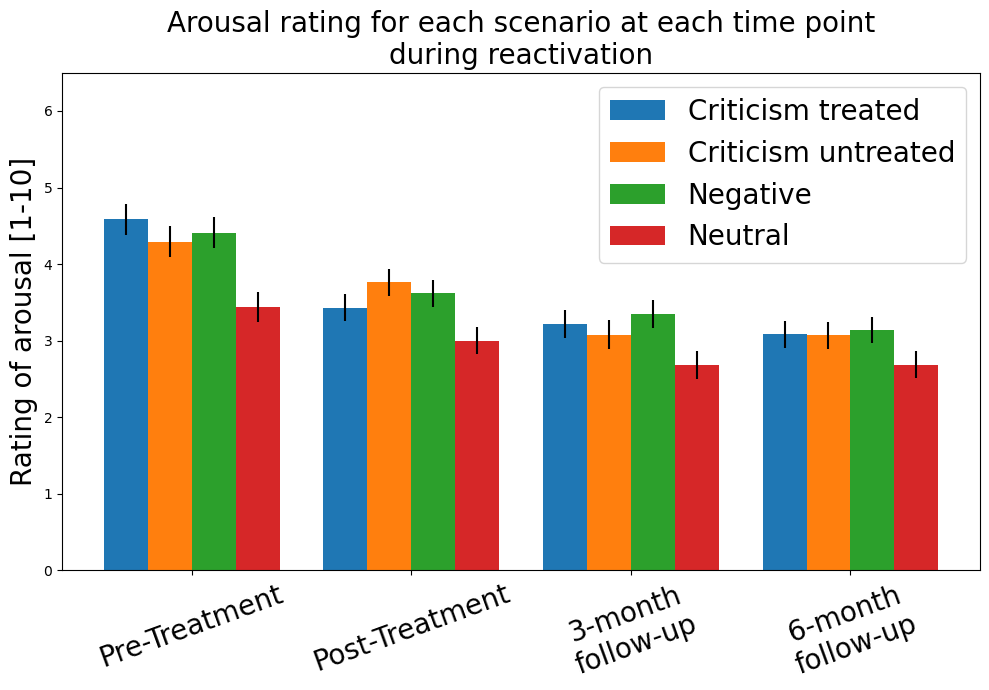

In [9]:

arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_(CritT|Crit|Neg|Neut)_ARO_suspence.*')]

plt.figure(figsize=[10,7])
X = np.arange(4)

plt.bar(X-0.3,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')].mean(),0.2,label='Criticism treated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
plt.bar(X-0.1,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Crit_')].mean(),0.2,label='Criticism untreated',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
plt.bar(X+0.1,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neg')].mean(),0.2,label='Negative',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))
plt.bar(X+0.3,arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neut')].mean(),0.2,label='Neutral',yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],group_12))

plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
plt.legend(fontsize = 20)
plt.title('Arousal rating for each scenario at each time point\nduring reactivation',fontsize=20)
plt.ylabel('Rating of arousal [1-10]',fontsize=20)
plt.ylim([0,6.5])

plt.tight_layout()
plt.savefig('Emotions_rating_diff_scenario_reactivation.png')

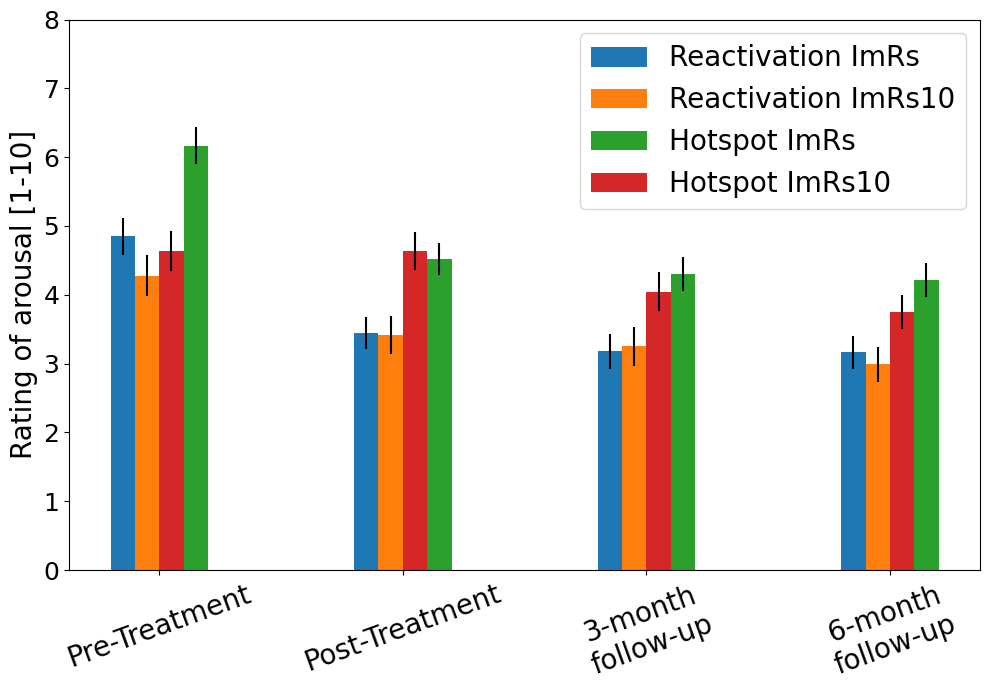

In [10]:

arousal_scenarios_sus = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_CritT_ARO_suspence.*')]
arousal_scenarios_hot = result.loc[:,result.columns.str.contains(fr'rat_TP[1,6,7,8]_CritT_P4_ARO_.*')]
arousal_scenarios_sus

plt.figure(figsize=[10,7])
X = np.arange(4)

plt.bar(X-0.15,
        arousal_scenarios_sus.
        loc[group1,arousal_scenarios_sus.columns.str.contains('CritT')].mean(),
        0.1,
        label='Reactivation ImRs',
        yerr=get_sterror(arousal_scenarios.loc[group1,arousal_scenarios.columns.str.contains('CritT')],group1))

plt.bar(X-0.05,
        arousal_scenarios_sus.
        loc[group2,arousal_scenarios_sus.columns.str.contains('CritT')].mean(),
        0.1,
        label='Reactivation ImRs10',
        yerr=get_sterror(arousal_scenarios.loc[group2,arousal_scenarios.columns.str.contains('CritT')],group2))

plt.bar(X+0.15,
        arousal_scenarios_hot.
        loc[group1,arousal_scenarios_sus.columns.str.contains('CritT')].mean(),
        0.1,
        label='Hotspot ImRs',
        yerr=get_sterror(arousal_scenarios.loc[group1,arousal_scenarios.columns.str.contains('CritT')],group1))

plt.bar(X+0.05,
        arousal_scenarios_hot.
        loc[group2,arousal_scenarios_sus.columns.str.contains('CritT')].mean(),
        0.1,
        label='Hotspot ImRs10',
        yerr=get_sterror(arousal_scenarios.loc[group2,arousal_scenarios.columns.str.contains('CritT')],group2))


plt.xticks(X, ['Pre-Treatment','Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
plt.yticks(fontsize=18)
plt.legend(fontsize = 20)
plt.ylabel('Rating of arousal [1-10]',fontsize=20)
plt.ylim([0,8])
plt.tight_layout()
plt.savefig('Rating_arousal_group_react_hotspot.png')

# Plotting difference in rating

In [11]:

# fig = plt.figure(figsize=[10,7])
# X = np.arange(len(tp1.T))

# for modality,label in zip(['GUI','ANG','SAD','FEA','DIS','ARO'],['guilt','anger','sadness','fear','disgust','arousal']):

#     arousal_scenarios = result.loc[:,result.columns.str.contains(fr'rat_(CritT|Crit|Neg|Neut)_{modality}_.*TP1TP[6,7,8]{part}')]

#     plt.figure(figsize=[12,8])
#     X = np.arange(3)

#     plt.bar(X-0.3,
#             -arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')].mean(),
#             0.2,
#             label='Criticism treated',
#             yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],
#                              group_12))
#     plt.bar(X-0.1,
#             -arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Crit_')].mean(),
#             0.2,
#             label='Criticism untreated',
#             yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],
#                              group_12))
#     plt.bar(X+0.1,
#             -arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neg')].mean(),
#             0.2,
#             label='Negative',
#             yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],
#                              group_12))
#     plt.bar(X+0.3,
#             -arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neut')].mean(),
#             0.2,
#             label='Neutral',
#             yerr=get_sterror(arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],
#                              group_12))


#     plt.xticks(X, ['Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=22,rotation=20)
#     plt.yticks(fontsize=22)
    
#     plt.legend(fontsize = 22)
# #     plt.title(f'Change of reaction to hotspot {label}',fontsize=20)
#     plt.ylabel(f'Rating of {label} [1-10]',fontsize=22)
#     plt.ylim([-4,3])
#     plt.tight_layout()
#     plt.savefig(f'Change of reaction to hotspot {label}.png')

In [12]:

# fig = plt.figure(figsize=[10,7])

# arousal_scenarios = result.loc[:,result.columns.str.contains(fr'SCL_TP[6,7,8]3_(CritT|Crit|Neg|Neut)_P4_mean')]
# tmp_tp1=result.loc[:,result.columns.str.contains(fr'SCL_TP1_CritT_P4_mean')].values
# plt.figure(figsize=[10,7])
# X = np.arange(3)

# tmp = (result.loc[:,result.columns.str.contains(fr'SCL_TP[6,7,8]3_(CritT|Crit|Neg|Neut)_P4_mean')]-result.loc[:,result.columns.str.contains(fr'SCL_TP1_CritT_P4_mean')].values)
# plt.bar(X-0.3,
#         tmp.loc[group_12,arousal_scenarios.columns.str.contains('CritT')].mean(),
#         0.2,
#         label='Criticism treated',
#             yerr=get_sterror((tmp.loc[group_12,arousal_scenarios.columns.str.contains('CritT')]),
#                              group_12)
#        )
# tmp = (result.loc[:,result.columns.str.contains(fr'SCL_TP[6,7,8]3_(CritT|Crit|Neg|Neut)_P4_mean')]-result.loc[:,result.columns.str.contains(fr'SCL_TP1_Crit_P4_mean')].values)

# plt.bar(X-0.1,
#         tmp.loc[group_12,arousal_scenarios.columns.str.contains(r'Crit')].mean(),
#         0.2,
#         label='Criticism untreated',
#             yerr=get_sterror(tmp.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],
#                              group_12)
#        )
# tmp = (result.loc[:,result.columns.str.contains(fr'SCL_TP[6,7,8]3_(CritT|Crit|Neg|Neut)_P4_mean')]-result.loc[:,result.columns.str.contains(fr'SCL_TP1_Neg_P4_mean')].values)

# plt.bar(X+0.1,
#         arousal_scenarios.loc[group_12,arousal_scenarios.columns.str.contains(r'Neg')].mean(),
#         0.2,
#         label='Negative',
#             yerr=get_sterror(tmp.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],
#                              group_12)
#        )
# tmp = (result.loc[:,result.columns.str.contains(fr'SCL_TP[6,7,8]3_(CritT|Crit|Neg|Neut)_P4_mean')]-result.loc[:,result.columns.str.contains(fr'SCL_TP1_Neut_P4_mean')].values)

# plt.bar(X+0.3,
#         tmp.loc[group_12,arousal_scenarios.columns.str.contains(r'Neut')].mean(),
#         0.2,
#         label='Neutral',
#             yerr=get_sterror(tmp.loc[group_12,arousal_scenarios.columns.str.contains('CritT')],
#                              group_12)
#        )


# plt.xticks(X, ['Post-Treatment','3-month\nfollow-up','6-month\nfollow-up'],fontsize=20,rotation=20)
# plt.legend(fontsize = 20)
# # plt.title(f'Change of reaction to hotspot {label}',fontsize=20)
# plt.ylabel(f'Difference in SCL between TP1 and TP',fontsize=20)
# # plt.ylim([-4,3])
# plt.tight_layout()
# plt.savefig('difference_SCL.png')